<a href="https://colab.research.google.com/github/xiiiq/portfolio/blob/main/Proyecto_An%C3%A1lisis_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto - Análisis supervisado
---
## KNN
## REGRESIÓN LOGÍSTICA
## ÁRBOLES DE DECISIÓN
## BAGGING AND BOOSTING
## SVM
## OVERSAMPLING AND UNDERSAMPLING
---


En este ejemplo vamos a trabajar con un conjunto de datos formado por un total de 14999 observaciones y 10 variables, consistente en estudiar diversas características de los empleados de una empresa en relación con su decisión de abandonar o no la empresa. Las variables en estudio, se van a describir posteriormente.


# Estudio descriptivo de los datos.

En este apartado vamos a familiarizarnos con la estructura que toman estos datos, así como con las diversas características de los mismos y posibles relaciones entre ellos.

Lo primero que hacemos es importar las librerías que vamos a necesitar y los datos en cuestión.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [ ]:
#Descarga manual: https://drive.google.com/file/d/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK/view?usp=sharing
#Descargamos los ficheros de Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2023-03-01 08:20:19--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 173.194.214.102, 173.194.214.113, 173.194.214.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b9ag1annp5nk3ona4nbfvjv86hn8tq3t/1677658800000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=c08599c9-5239-4203-8acc-21725fd6dd2a [following]
--2023-03-01 08:20:19--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b9ag1annp5nk3ona4nbfvjv86hn8tq3t/1677658800000/14644984037434537262/*/1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK?e=download&uuid=c08599c9-5239-4203-8acc-21725fd6dd2a
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 172.217.203.132, 

Si no conseguís descargar el fichero con el anterior comando, también lo tenéis a vuestra disposición en los **Recursos del proyecto** con el nombre `Rotacion_empleados.csv`.

In [ ]:
# Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

In [ ]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [ ]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#obtenemos información sobre las variables que contiene este data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla `department`, que es lo que hacemos a continuación.

In [ ]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Análisis descriptivo de los datos

Antes de iniciar la construcción de cualquier modelo de Machine Learning, es primordial realizar un análisis exploratorio que nos permita familiarizarnos con los datos y extraer las primeras conclusiones de los mismos.


### Ejemplo

Evaluamos el porcentaje de empleados que pertenencen a cada uno de los departamentos (variable que anteriormente se llamaba `sales`y ahora se llama `department`).

In [ ]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

Los datos anteriores en formato de gráfico, los obtendremos de la siguiente manera:

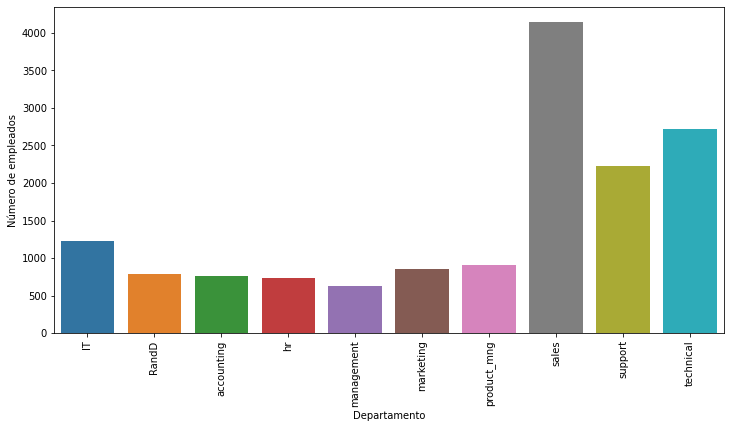

In [ ]:
plt.figure(figsize=(12,6))
data_group = datos.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

plt.xticks(rotation = 90);

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

**¡Ahora es tu turno! ¿Qué más gráficos se te ocurren que pueden aportar una información valiosa al análisis?**

Os facilito un par de enlaces que os pueden servir de inspiración para realizar esta parte:




*   [Introducción a la estadística descriptiva](https://deepnote.com/@anthonymanotoa/Apuntes-de-Estadistica-Descriptiva-cfa882b6-c07f-43fe-9901-1c2e471ce120): Para aquellos que de seen introducirse a la analítica descriptiva desde cero.
*   [Análisis de datos categóricos con Python](https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/): Enfocado en el estudio de variables categóricas.
*   [Análisis exploratorio de datos con Python](https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python#AN%C3%81LISIS-EXPLORATORIO-DE-DATOS-CON-PYTHON): Estudia la relación entre variables categóricas y variables continuas.

Sin embargo, éstos no dejan de ser unos de los muchos ejemplos sobre cómo realizar el análisis exploratorio, así que tenéis total libertad para explorar y realizar cualquier análisis adicional que se os ocurra.


---
Para familiarizarnos un poco mejor con las variables realizaremos algunos análisis previos adicionales para comprender un poco mejor cada una de las variables. Posteriormente realizaremos algunos gráficos, comentarios y conclusiones obtenidas en los análisis.

In [ ]:
# Queremos hacernos una idea del número de diferentes valores que toman algunas variables.
datos.agg(['nunique']).T

,nunique
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
left,2
promotion_last_5years,2
department,10
salary,3


Podemos observar con el valor 2, en el que se encuentra nuestra variable objetivo, el conjunto de las variables dicotómicas.

Como hemos visto anteriormente a través de ```datos.info``` teníamos dos variables categóricas; departament y salary, con 10 y 3 valores diferentes respectivamente.

Disponemos de dos variables de tipo entero que son cuantitativas discretas que serían "time_spend_company" y "number_project", con 8 y 6 valores diferentes en cada uno.

Por último, disponemos de 3 variables que toman un número más alto de valores posibles. Por un lado tenemos "average_montly_hours" que sería una variable cuantitativa discreta y por otro lado tenemos las variables "satisfaction_level" y "last_evaluation" que son de tipo numérico y decimal.

In [ ]:
# Obtenemos descriptivos estadísticos
datos.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


De la tabla anterior podemos obtener algunas informaciones relevantes:

- Aunque son apreciaciones subjetivas podemos ver que la media de satisfacción de los empleados es ligeramente menor que la apreciación por sus empleadores. Existe una mejor apreciación por parte de los empleadores del desempeño de sus trabajadores. El 75% de sus empleados obtienen una valoración igual o mayor del 0.56 (1er cuartil (25%) = 0.56), mientras que para el mismo conjunto en el caso de la satisfacción de los trabajadores no supera el 0.44.

***Ver el gráfico de comparativa de más abajo ***
- Parece que no se trabaja poco de media en ese sitio. Trabajar 201 horas al mes no está nada mal. Habrá un gran número de trabajadores que superarán ese umbral ya que tenemos una desviación media de 50 horas con respecto a dicho valor. Posteriormente compararemos ambas variables.
- El tiempo medio en la compañía es de 3.5 años. Posteriormente comprobaremos si existe algún tipo de relación lineal entre esta variable y nuestra variable objetivo.

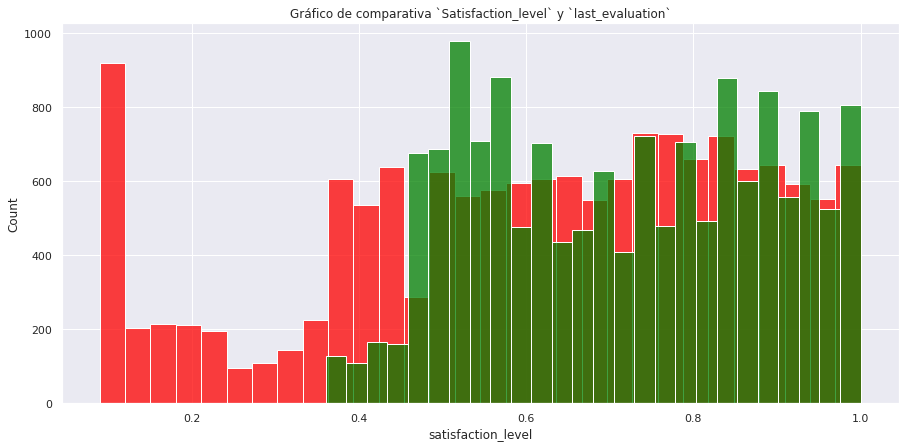

In [ ]:
#Gráfico de comparativa `Satisfaction_level` y `last_evaluation`
sns.set(rc={'figure.figsize':(15,7)})
fig, ax = plt.subplots()
sns.histplot(data=datos, x='satisfaction_level', ax=ax, kde=False, color='red')
sns.histplot(data=datos, x='last_evaluation', ax=ax, kde=False, color='green')
plt.title("Gráfico de comparativa `Satisfaction_level` y `last_evaluation`")
plt.show()

Podemos observar que no hay valoraciones por parte de los empleadores por debajo de 0.3.
Realizamos otros gráficos a continuación:

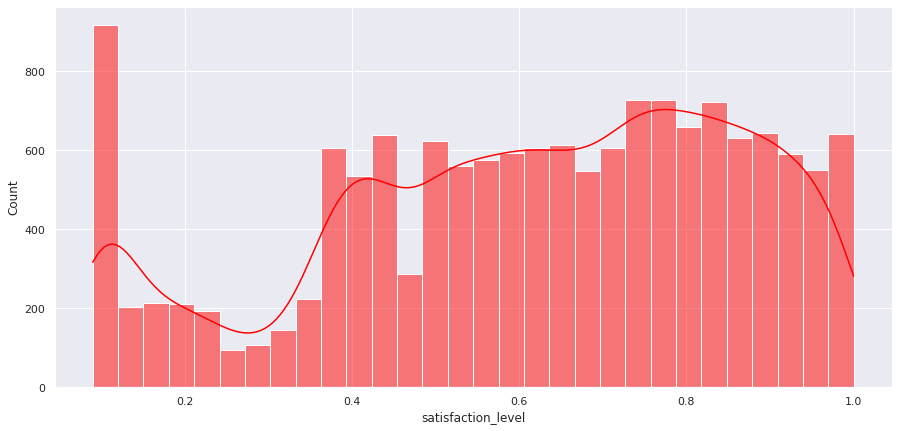


Se puede observar el elevado número de trabajadores insatisfechos en la primera barra






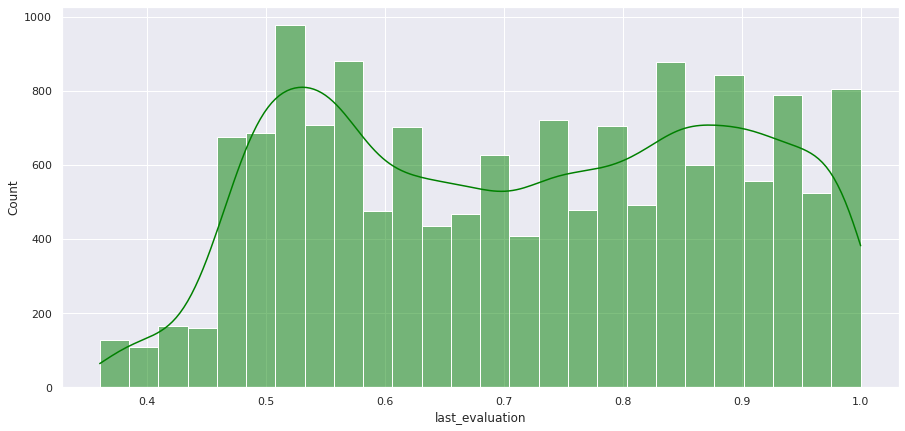


Como comentábamos anteriormente, hay pocas valoraciones bajas por parte de los empleadores






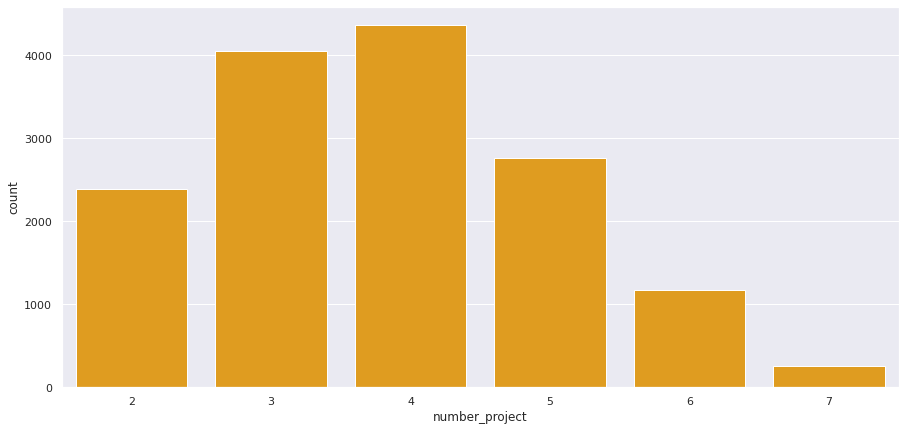

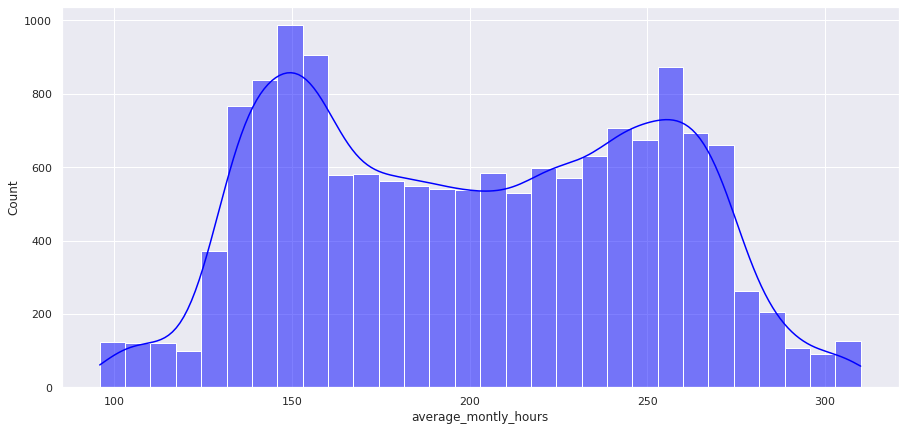


Parece que tenemos dos distribuciones normales en una sóla. Esto puede deberse a los conjuntos

de trabajadores que trabajan en unos proyectos u otros, es decir, algunos de los proyectos requieren

más horas de trabajo que otros. Por eso parece haber dos grupos de distribución en función de los

proyectos en los que estén trabajando





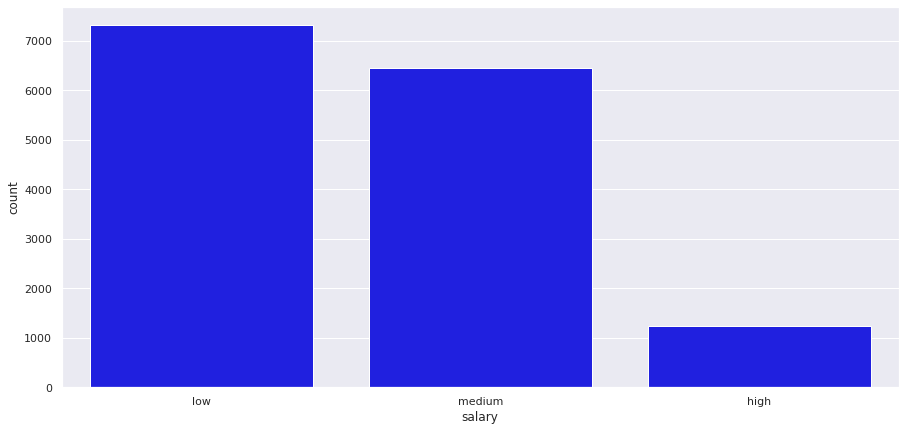

El total es:
 low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [ ]:
# Hacemos gráficos de algunas variables para ver su distribución

sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(data=datos, x='satisfaction_level', kde=True, color='red')
plt.show()
print("\nSe puede observar el elevado número de trabajadores insatisfechos en la primera barra\n\n\n\n")

sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(data=datos, x='last_evaluation', kde=True, color='green')
plt.show()
print("\nComo comentábamos anteriormente, hay pocas valoraciones bajas por parte de los empleadores\n\n\n\n")

sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(data=datos, x='number_project', color='orange') # Hacemos gráfico de barras en este caso
plt.show()
print("\n\n\n\n")

sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(data=datos, x='average_montly_hours', kde=True, color='blue')
plt.show()
print("""\nParece que tenemos dos distribuciones normales en una sóla. Esto puede deberse a los conjuntos\n
de trabajadores que trabajan en unos proyectos u otros, es decir, algunos de los proyectos requieren\n
más horas de trabajo que otros. Por eso parece haber dos grupos de distribución en función de los\n
proyectos en los que estén trabajando\n\n\n""")

sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(data=datos, x='salary', color="blue")
plt.show()
print("El total es:\n",datos["salary"].value_counts())



A continuación vamos a obtener relaciones de algunas variables con respecto a nuestra variable objetivo:

<AxesSubplot:>

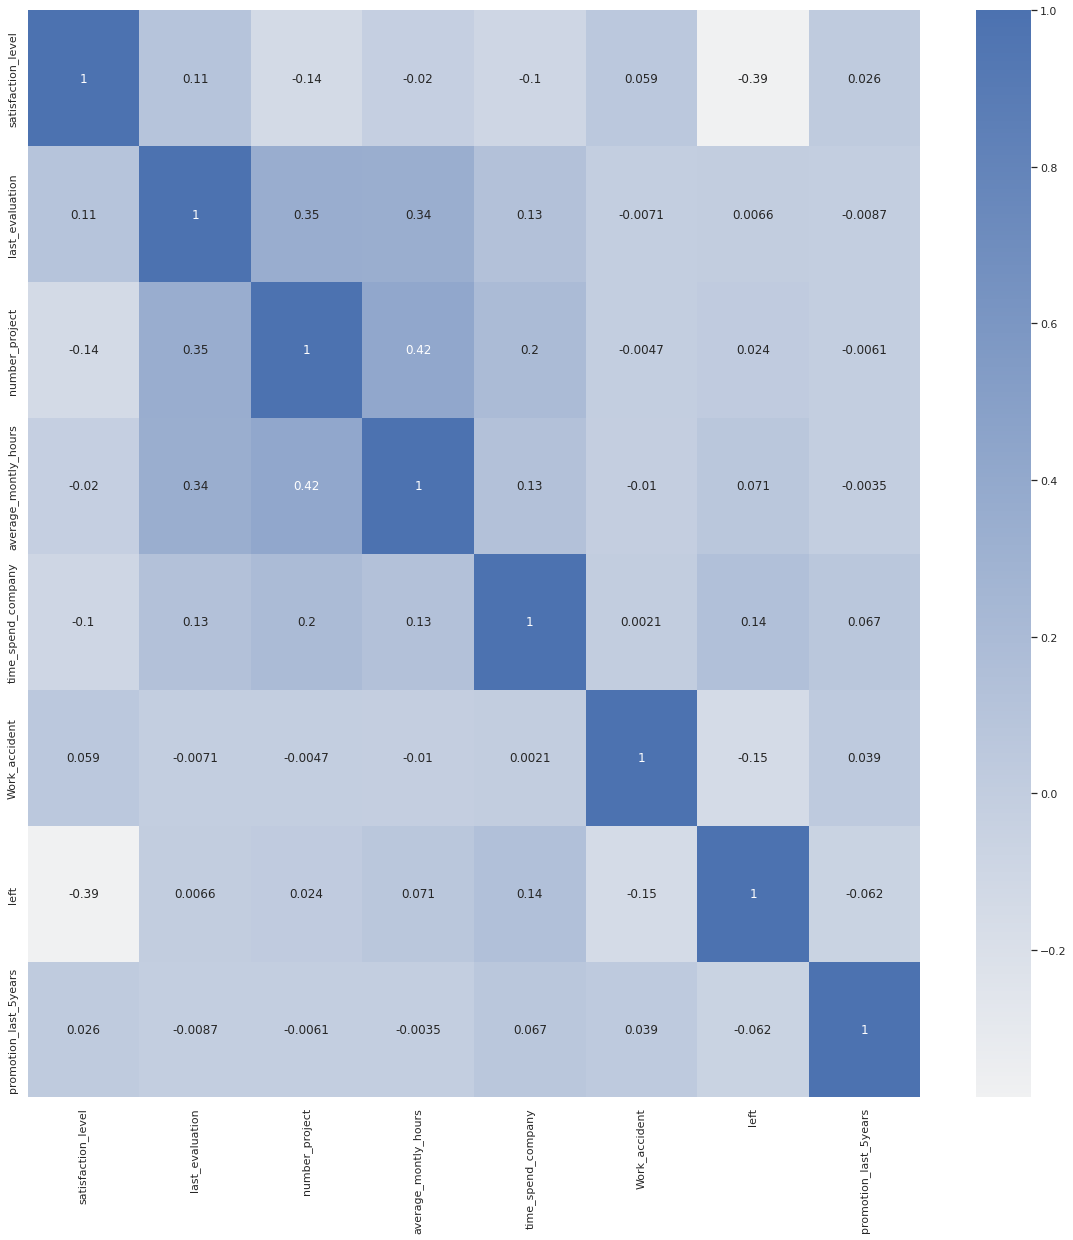

In [ ]:
# Haremos primero correlaciones para ver la relación lineal entre nuestras variables.
plt.figure(figsize=(20,20))
corr = datos.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

No parece haber relación lineal fuerte entre nuestro conjunto de variables.

In [ ]:
# Vamos a calcular ahora la media de cada variable con respecto a nuestra variable objetivo

cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']
for col in cols:
    if col == 'left':
        continue
    grouped = datos.groupby("left")[col]
    print(f"La media de {col} en función de left es:\n{grouped.mean()}\n")

La media de satisfaction_level en función de left es:
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

La media de last_evaluation en función de left es:
left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

La media de number_project en función de left es:
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

La media de average_montly_hours en función de left es:
left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

La media de time_spend_company en función de left es:
left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64

La media de Work_accident en función de left es:
left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64

La media de promotion_last_5years en función de left es:
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64



A simple vista no parece que encontremos nada significativo salvo en nuestra variable de satisfacción del empleado, donde podemos observar que hay 0.22 puntos de diferencia en la satisfacción entre los que se quedan y los que se van. Podemos verlo en la siguiente gráfica:

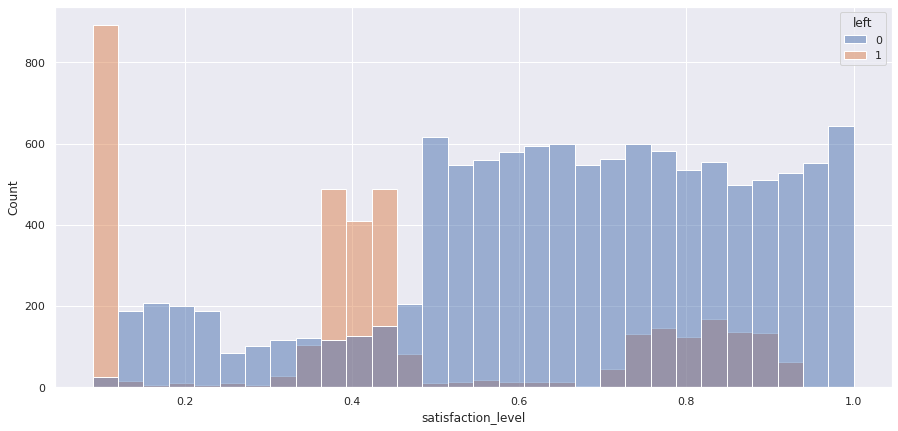

In [ ]:
# Hacemos un gráfico que nos muestre el grado de satisfacción de los que abandonaron y los que no
sns.histplot(data=datos, x='satisfaction_level', hue='left')
plt.show()

En esta gráfica encontramos algo más revelador. Aquellos que valoraron mal su satisfacción en la empresa abandonaron. Hacemos algún gráfico más por si encontramos alguna otra información significativa:

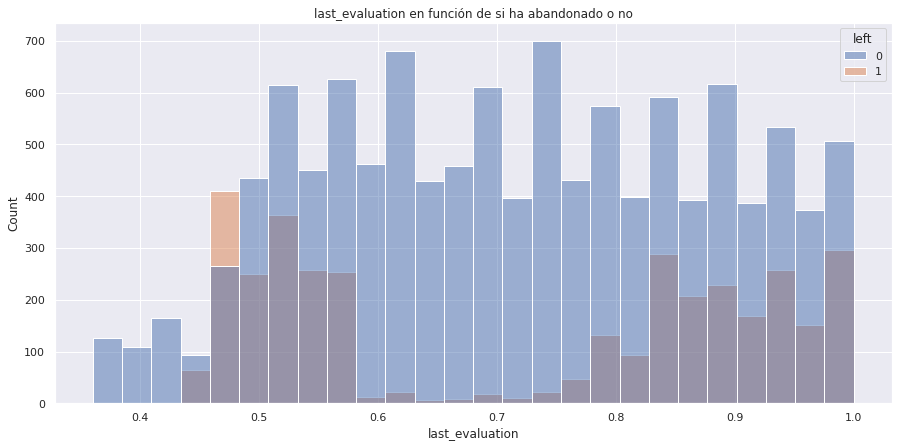

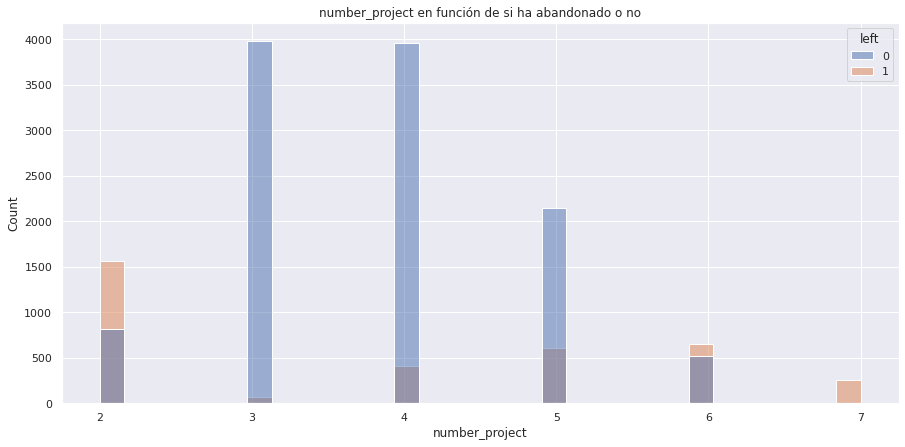

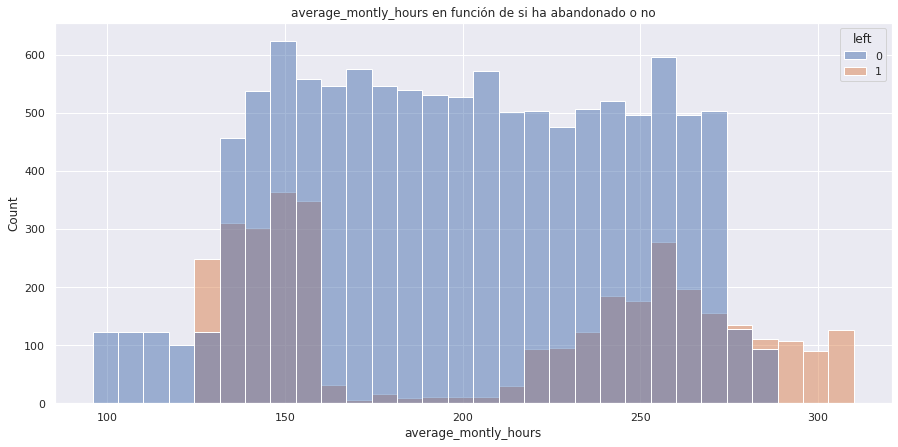

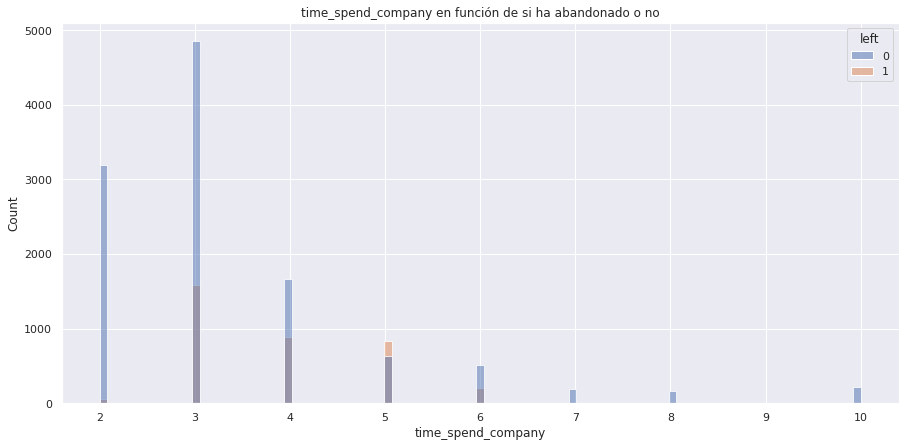

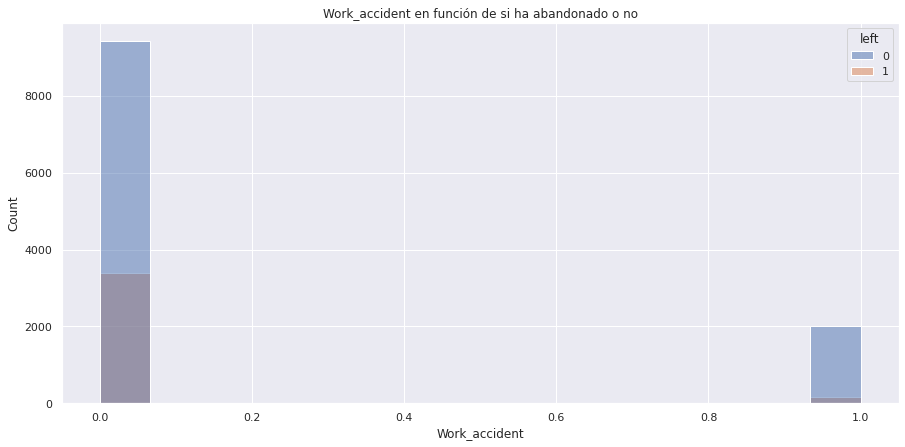

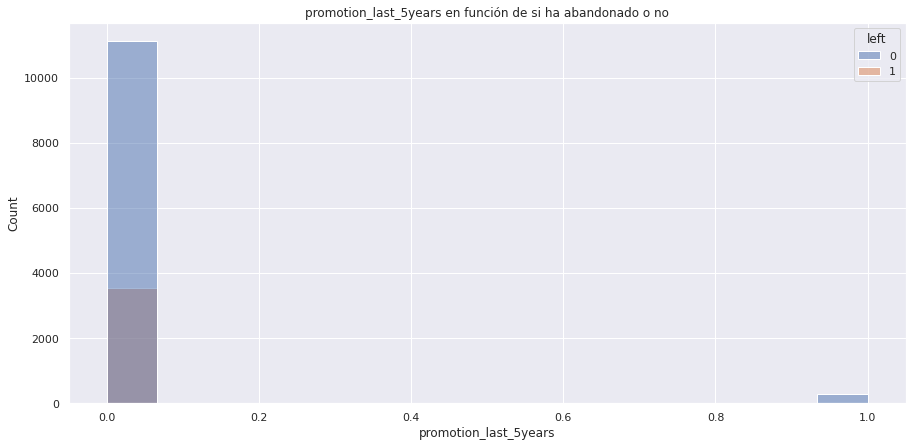

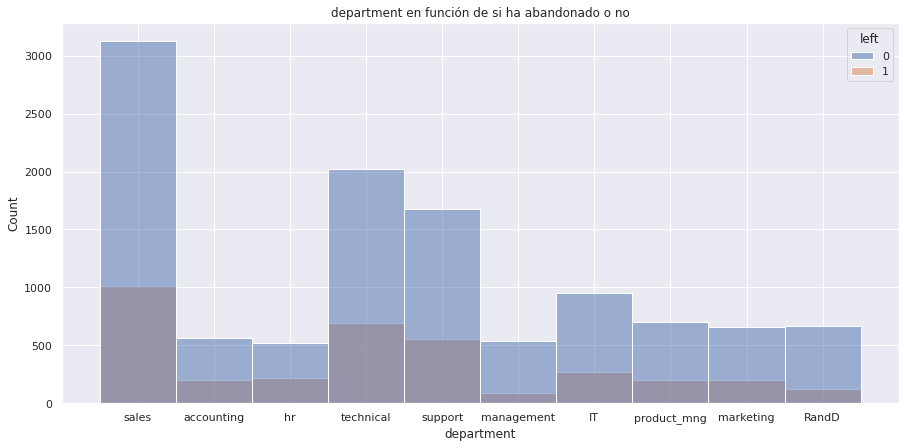

In [ ]:
# Hacemos nuevos gráficos que muestren la relación con nuestra variable objetivo

exclude_cols = ["satisfaction_level","left", "salary"] #eliminamos algunas variables de nuestro estudio. Eliminamos Salary y department porque no las hemos transformado todavía
columns = [col for col in datos.columns if col not in exclude_cols]

for col in columns:
    sns.histplot(data=datos, x=col, hue='left')
    plt.title(f"{col} en función de si ha abandonado o no")
    plt.show()

Podemos destacar el caso en el que aquellos que tienen 7 proyectos abandonaron la empresa y aquellos con casi 300 horas abandonan también.

## Análisis predictivo

### Preparación de los datos

¿Existe alguna variable categórica que queramos utilizar en nuestro modelo? Puedes volver a revisar el vídeo de la Clase 1 Tema 4 - **Laboratorio Preprocesamiento de datos: parte 2**, donde a partir del minuto 5:55 se explica en detalle cómo proceder en estos casos.

---
Resultaría interesante trabajar con las dos variables categóricas:
a) Department - Puede que haya algún departamento donde hay más abandonos
b) Salary - El salario influye en la tasa de abandono

In [ ]:
# Así que efectuamos las transformaciones
datos = pd.get_dummies(datos)
datos

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Hemos transformado nuestras 2 variables categóricas:

a) Salary se ha dividido en 3: low,medium y high.

b) Department se ha dividido en cada uno de los 10 departamentos que teníamos.

### Implementación de los modelos

Es importante tener en cuenta que estamos ante un problema de clasifiación binaria (0: No abandona, 1: Sí abandona). Por lo tanto, de entre los 4 diferentes algoritmos que hemos visto esta semana **sólo podemos aplicar 2**
, ¿cuáles son?

**Los algoritmos son KNN y regresión logística.**

En los vídeos de los laboratorios podéis encontrar una carpeta con los **recursos** de apoyo que contiene un ejemplo paso a paso sobre cómo implementar estos modelos en Python. Os animo a entenderlos bien y tratar de seguir el mismo procedimiento para estos datos.

**IMPORTANTE**: Recordad que antes de entrenar un modelo es clave particionar los datos en, al menos, dos conjuntos diferentes: uno para entrenar el modelo (train) y otro para evaluar su capacidad predictiva (test).

In [ ]:
from sklearn.model_selection import train_test_split

# Creamos la variable objetivo y las variables explicativas

y = datos["left"]
X = datos.drop(["left"],axis=1)

# Creamos los diferentes conjuntos

from sklearn.model_selection import train_test_split

# Elegimos el 20% de los datos para test y random_state=42 por convención
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, shuffle= True, random_state= 42)


* Aplicamos la corrección propuesta por la tutura e introducimos el parámetro ```stratify=y```para conservar la misma proporción en el conjunto de entrenamiento y en el de test.

#### Modelo 1 - KNN

In [ ]:
import numpy as np
# Para este modelo transformamos los datos a formato numpy array, puesto que es el formato requerido por KNN de Scikit-Learn
X_train= np.asarray(X_train)
y_train= np.asarray(y_train)

X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

# Vemos el tamaño de las muestras
print(f'Tamaño datos entrenamiento: {X_train.shape[0]} muestras \nTamaño datos test: {X_test.shape[0]} muestras')

Tamaño datos entrenamiento: 11999 muestras 
Tamaño datos test: 3000 muestras


El algoritmo se basa en distancias euclídeas entre los puntos de datos. Hemos visto que la variable "average_montly_hours" tiene una escala mucho mayor que las demás y su influencia será mucho mayor que el resto de variables con menor escala. Así que equilibramos estas magnitudes para tener un peso adecuado en la clasificación.

In [ ]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train)
normalized_X_train= scaler.transform(X_train) # Aplicamos el escalado a datos de entrenamiento
normalized_X_test= scaler.transform(X_test) # Aplicamos el escalado a datos de test

In [ ]:
# Implementamos el algoritmo KNN importando previamente la librería

from sklearn.neighbors import KNeighborsClassifier

K = 3 # Utilizaremos este valor de k
knn=KNeighborsClassifier(n_neighbors= K)
knn.fit(normalized_X_train, y_train)
y_pred= knn.predict(normalized_X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


Este sería el conjunto de predicciones de nuestro modelo. Vamos a evaluar la precisión de nuestro modelo con diferentes métricas:

In [ ]:
# Evaluaremos su accuracy

from sklearn.metrics import accuracy_score
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred).round(2)}, nuestro modelo clasifica correctamente el {accuracy_score(y_test, y_pred).round(2)*100}% de las observaciones')

El accuracy obtenido es de 0.93, nuestro modelo clasifica correctamente el 93.0% de las observaciones


In [ ]:
# Sacamos la matriz de confusión
from sklearn.metrics  import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2154,  132],
       [  71,  643]])

El modelo clasificó correctamente 2154 veces cuando no abandonó la empresa y 643 cuando sí que la abandonó. Pero vemos también que el modelo a tenido 132 casos donde el modelo decía que no abandonó la empresa cuando lo hizo en realidad y 71 casos en el que el modelo predice que abandonó la empresa y en realidad no la abandonó.

In [ ]:
# Informe con más métricas de evaluación con la función "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2286
           1       0.83      0.90      0.86       714

    accuracy                           0.93      3000
   macro avg       0.90      0.92      0.91      3000
weighted avg       0.94      0.93      0.93      3000



- Como podemos ver por los resultados, nuestra precisión es más alta cuando ha de predecir que no abandona (0.97) que cuando abandona, con una precisión promedio de 90%.
- La sensibilidad (recall) de cuando no abandona (en adelante clase 0 y clase 1) es de 0.94 y cuando abandona de 0.9, el valor promedio es del 92%. Esto quiere decir que detecta correctamente con esos porcentajes cuando son realmente de esa clase, por la definición de sensibilidad.
- El f1-score combina los dos elementos anteriores, un f1-score alto indica que el modelo es bueno tanto si etiqueta correctamente todos los positivos y los negativos. Obtenemos un mejor resultado en la clase 0, pero podemos decir que en promedio 93% se realiza una buena clasificación.

#### Modelo 2 - Regresión logística

In [ ]:
# Estandarizamos las variables de X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Es importante estandarizarla porque si no el algoritmo nos da un error porque no ha convergido después de alcanzar el número máximo de iteraciones permitidas. Por eso, escalando los datos ayudamos a mejorar la convergencia

In [ ]:
# Ajustamos el modelo al conjunto de entrenamiento.

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Este algoritmo no busca predecir la variable objetivo directamente, es decir, no busca obtener un 1 o un 0, sino lo que busca es obtener la probabilidad de pertenencia a una clase. Así que tenemos que sacar las probabilidades de pertenecer a una clase u otra.

In [ ]:
# Predicción de los datos test
y_pred = classifier.predict(X_test)
# Predicción de las probabiliades
probs_y=classifier.predict_proba(X_test)

In [ ]:
#Combinamos predicciones con probabilidades para una mejor comprensión
np.c_[y_pred, probs_y]

array([[0.        , 0.92436157, 0.07563843],
       [0.        , 0.93557773, 0.06442227],
       [0.        , 0.71946096, 0.28053904],
       ...,
       [0.        , 0.89074378, 0.10925622],
       [0.        , 0.84205166, 0.15794834],
       [0.        , 0.8675811 , 0.1324189 ]])

Esta enorme matriz nos indica en la primera columna las predicciones realizadas y en la segunda y tercera las probabilidades resultado de dicha predicción. En el primer caso predice 0 (no me voy de la empresa) con una probabilidad de 0.69 o lo que es lo mismo con una probabilidad de 1-0.69, que nos daría el valor de la segunda columna.

In [ ]:
# Evaluaremos su accuracy
classifier.score(X_test,y_test)
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred).round(2)}, nuestro modelo clasifica correctamente el {accuracy_score(y_test, y_pred).round(2)*100}% de las observaciones')

El accuracy obtenido es de 0.79, nuestro modelo clasifica correctamente el 79.0% de las observaciones


In [ ]:
# Sacamos la matriz de confusión
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2130,  156],
       [ 462,  252]])

Como podemos deducir del resultado accuracy anterior (que es peor que el que obtuvimos con el algoritmo KNN) en este caso tenemos más equivocaciones. Clasificó correctamente cuando no abandonó la empresa 2130 veces y cuando la abandonó 252, por otro lado, erró cuando clasificó 156 veces que no abandonó la empresa y 462 cuando dijo que abandonó.

In [ ]:
# Informe con más métricas de evaluación con la función "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.35      0.45       714

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



A primera vista, podemos ver que hemos obtenido peores resultados que con el algoritmo anterior:

- Nuestra precisión es más alta cuando ha de predecir que no abandona (0.82) que cuando abandona, con una precisión promedio de 72%.
- La sensibilidad de cuando no abandona es de 0.93 y cuando abandona de 0.35 (malísimo resultado), el valor promedio es del 64%. Esto quiere decir que sólo logra detectar correctamente el 35% de los casos de los trabajadores que abandonarán la empresa. Es un problema importante, porque no es muy útil para predecir si los trabajadores son propensos a abandonar la empresa.
- El f1-score es bastante bajo en la clase 1, con solo un 45%. Nos indicaría una mala combinación de precisión y recall en la clase 1.



**CONCLUSIONES**

En general, estos resultados sugieren que el modelo de regresión logística no está funcionando muy bien en este problema de clasificación binaria. Se han obtenido unos resultados muy buenos con el algoritmo de KNN, por lo que es un modelo que funciona mejor a la hora de detectar si un trabajador continúa o abandona la empresa.

El modelo de KNN tiene mejor desempeño en todas las métricas: precisión, sensibilidad y f-1 score.

Lo único que podríamos considerar es la modificación de los hiperparámetros de nuestro algoritmo de regresión logística: la tasa de aprendizaje, regularización y el número máximo de iteraciones. En ese caso podríamos determinar cuál sería el mejor modelo para la clasificación.

---

 La empresa que nos ha encargado el proyecto está sorprendida por los resultados obtenidos en el sprint 1, pero al ser su primer proyecto de analítica de datos, no se llega a fiar de los mismos. Es por ello que nos han pedido utilizar algún modelo que les ayude a entender mejor los motivos por los que el empleado toma la decisión de abandonar la empresa.

Con el fin de satisfacer los deseos del cliente, hemos decidido utilizar un modelo de tipo “caja blanca”: los árboles de decisión.

Por lo tanto, en este sprint se ampliará el estudio realizado en el sprint anterior, construyendo varios árboles de decisión bajo distintas configuraciones de hiperparámetros, identificando la mejor combinación. Una vez identificado el mejor, representarlo visualmente de forma que se pueda comprender la serie de reglas que ha deducido de los datos y, por último, comparar con los resultados del mejor modelo del sprint 1, y exponer las ventajas que nos aporta uno y otro.

Se pide:

##Entrenamos al menos 3 árboles de decisión diferentes:


### Gráfico 1 - Sin aplicar ningún criterio de poda (sin especificar hiperparámetros)

In [ ]:
## importamos dependencias
from sklearn import tree #Para resolver el árbol
from sklearn.tree import DecisionTreeClassifier # Importamos el calsificador
import pydotplus # Para ver el árbol generado
from sklearn import metrics #Importamos métricas del módulo de scikit-learn para calcular lel accuracy del modelo
from IPython.display import Image  # Para mostrar la imagen del gráficoTo Display a image of our graph


In [ ]:
# Creamos el objeto de clasificación Decision Tree
clf = DecisionTreeClassifier()

# Ajustamos el conjunto de entrenamiento
clf = clf.fit(X_train,y_train)

#Creamos la predicción del conjunto test
y_pred = clf.predict(X_test)

In [ ]:
# Calculamos el accuracy del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

Accuracy: 0.976


Hemos obtenido una proporción de las cantidades de resultados verdaderos con respecto a nuestro total de datos muy bueno, del 97%.

Obtenemos la matriz de confusión y otras métricas relevantes:

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Matriz de confusión:\n\n",conf_matrix)

Matriz de confusión:

 [[2236   50]
 [  22  692]]


Aquí tenemos nuestra matriz con unos buenos resultados en donde vemos que para un tamaño de 3000 muestras clasifica correctamente 2234 casos en donde el trabajador no abandona la empresa y 690 cuando abandona. Y comete error a la hora de clasificar 52 que no abandonaron cuando realmente lo hicieron y 24 que sí abandonaron cuando realmente no lo hicieron. Veamos por tanto la precisión, la sensibilidad (recall) y el f1-score con el ```classification_report```:

In [ ]:
print("Classification report: \n\n",classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2286
           1       0.93      0.97      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Precisión - Vemos unos valores muy buenos en la detección de verdaderos positivos y unos resultados algo peores en los falsos positivos, 99% y 93% respectivamente.

Sensibilidad - La sensibilidad (recall) de cuando no abandona es de 0.98 y cuando abandona de 0.97, el valor promedio es del 97%. Esto quiere decir que detecta correctamente con esos porcentajes cuando son realmente de esa clase, por la definición de sensibilidad.

F1 score - Como hemos obtenido una precisión y sensibilidad muy buenas, nuestro F1-score, al ser una combinación de ellas, nos ofrece un gran resultado. 0.98 y 0.95 para las clases, con una media de 0.97. El modelo tiene un buen desempeño en términos de equilibrio entre la precisión y la sensibilidad en ambas clases.

Calculamos la curva ROC y el área bajo la curva:

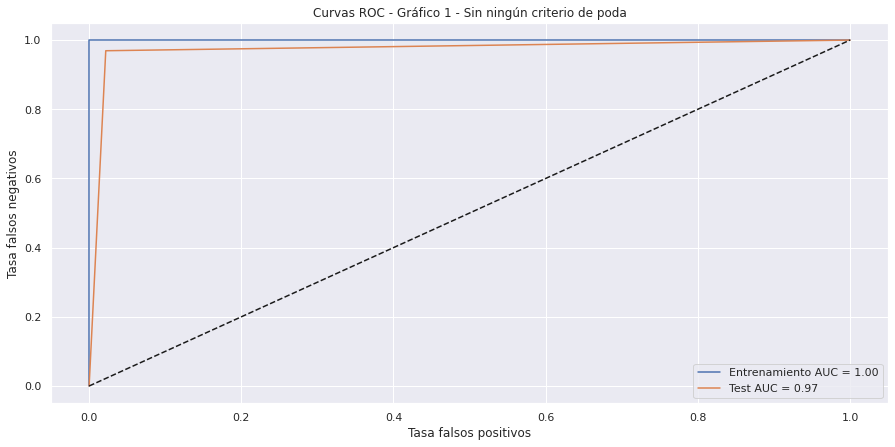

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train)[:,1]
y_test_proba = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1 - Sin ningún criterio de poda')
plt.legend(loc='lower right')
plt.show()

Visualizamos el árbol creado:

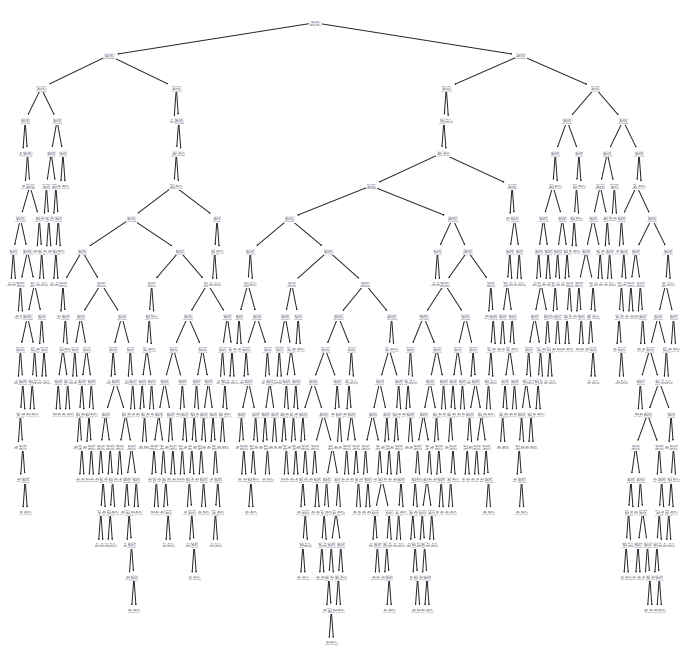

In [ ]:
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(clf);

No hemos puesto hiperparámetros de ningún tipo, así que como podemos observar en las curvas ROC nuestro modelo está sobreajustado. El modelo ha memorizado los datos de entrenamiento y no será útil para generalizar bien a datos nuevos. Por otro lado, podemos ver que nuestro árbol es muy grande e ininteligible por lo que no se puede comentar nada.

###Aplicando diferentes configuraciones de hiperparámetros que controlen el crecimiento del mismo durante el entrenamiento.

2 gráficos:



####Gráfico 2 - Gráfico de decisión con una profundidad de 3

Para no sobredimensionar el tamaño de la práctica, los comentarios en la evaluación de las métricas serán algo menos extensos. Salvo si hay alguna información significativa.

In [ ]:
# Creamos el objeto de clasificación
clf = DecisionTreeClassifier(max_depth=3)

# Ajustamos el árbol
clf = clf.fit(X_train,y_train)

#Predcimos los valores de test
y_pred = clf.predict(X_test)

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9543333333333334


In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Matriz de confusión:\n\n",conf_matrix)

Matriz de confusión:

 [[2204   82]
 [  55  659]]


In [ ]:
print("Classification report: \n\n",classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.89      0.92      0.91       714

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.94      3000
weighted avg       0.96      0.95      0.95      3000



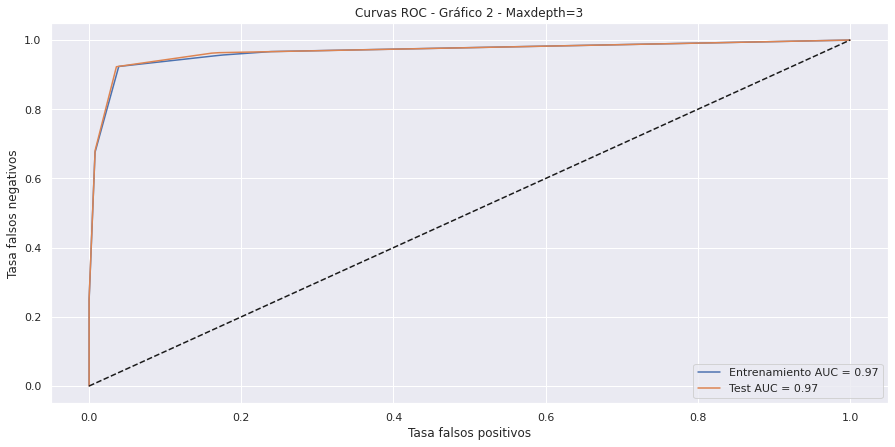

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train)[:,1]
y_test_proba = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 2 - Maxdepth=3')
plt.legend(loc='lower right')
plt.show()

Hemos obtenido buenos resultados, el modelo ha aprendido bien y puede hacer predicciones precisas para nuevos datos. Hemos bajado un poco en todas las métricas pero seguimos teniendo un buen desempeño.

Hacemos una visualización a continuación, pero esta vez utilizaremos ```export_graphviz```

In [ ]:
!pip install graphviz

!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


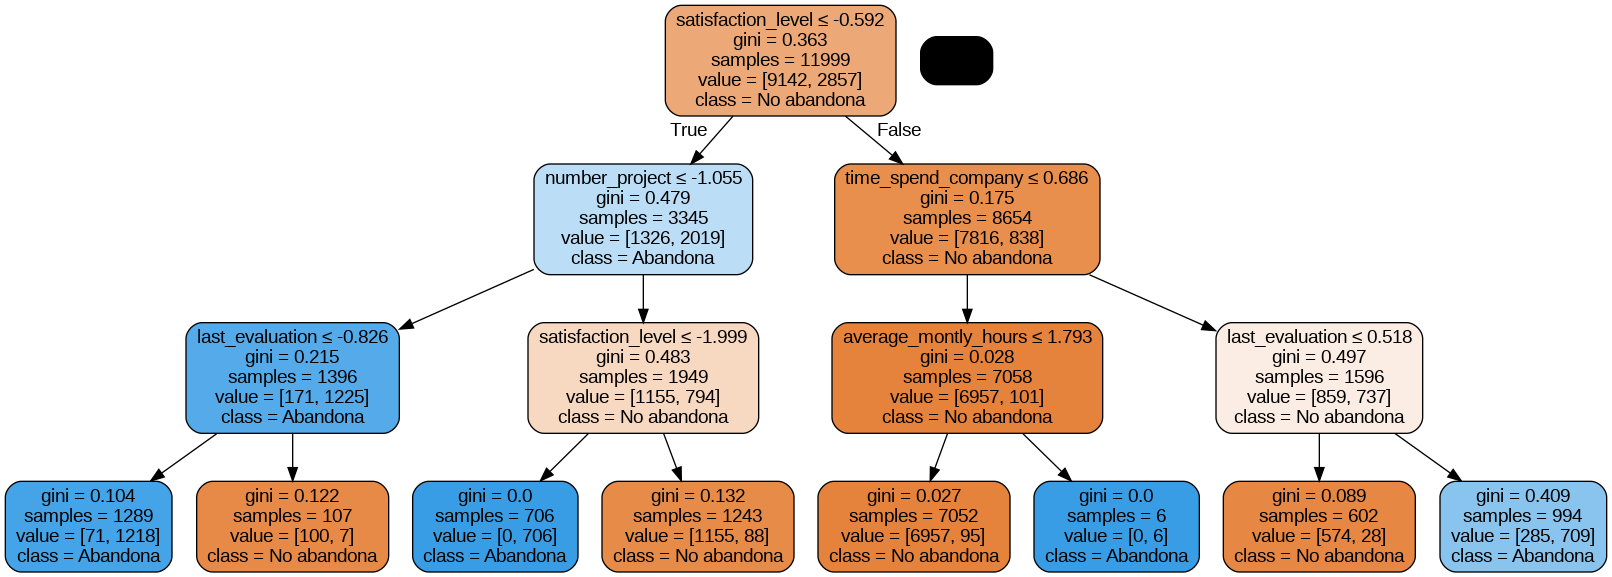

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
datos1=datos.drop("left", axis=1) #No conseguía cargar el gráfico y se me ha ocurrido esto. Ya preguntaré en el foro (o consultaré el Sprint del profesor)
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = datos1.columns ,class_names=['No abandona','Abandona'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arbol2.png')
Image(graph.create_png())

En este caso sí que tenemos un árbol en donde se puede ver con más claridad cada uno de los nodos. Vemos cómo habíamos pedido una profundidad de 3 nodos y nuestro árbol para cuando esto sucede.

Como podemos ver en nuestro árbol, tenemos un nodo raíz que establece la primera separación de los datos en función del "satisfaction level <= 0.592" y vemos cómo va bajando. Tiene un índice de Gini elevado por lo que denota heterogeneidad. A continuación vemos cómo va bajando. Crea 2 nuevos nodos que establecen 2 nuevas separaciones en función del "number_project<= 1.055" y "time_spend_company<=0.68" y así sucesivamente va bajando. Es cierto que en nuestros nodos finales hay un caso (el de la derecha del todo) que no tiene mucha homogeneidad, el valor de Gini es elevado y podríamos seguir profundizando.

Podemos decir por tanto, que nuestro "Gráfico 2 - maxdepth=3" tiene un buen desempeño. Nos piden un tercer gráfico y vamos a obtenerlo.

#### Gráfico 3 - Gráfico obtenido a través de GridSearch.

GridSearch en DecisiontreeClassifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir la gama de hiperparámetros a considerar
param_grid = {"max_depth": [3,4,5],
              "criterion": ["gini", "entropy"], # A pesar de que Gini funciona mejor para gran cantidad de datos probaremos el gridSearch
             "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

# Creo una variable con DecisionTreeClassifier()
tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Entreno el modelo
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros: ", grid_search.best_params_)


Mejores hiperparámetros:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 18}


In [ ]:
# Creamos el objeto de clasificación
clf = DecisionTreeClassifier(max_depth=5,
                             criterion="gini",
                             max_features=18)

# Ajustamos el árbol
clf = clf.fit(X_train,y_train)

#Predcimos los valores de test
y_pred = clf.predict(X_test)

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9743333333333334


In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Matriz de confusión:\n\n",conf_matrix)

Matriz de confusión:

 [[2262   24]
 [  53  661]]


In [ ]:
print("Classification report: \n\n",classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.93      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



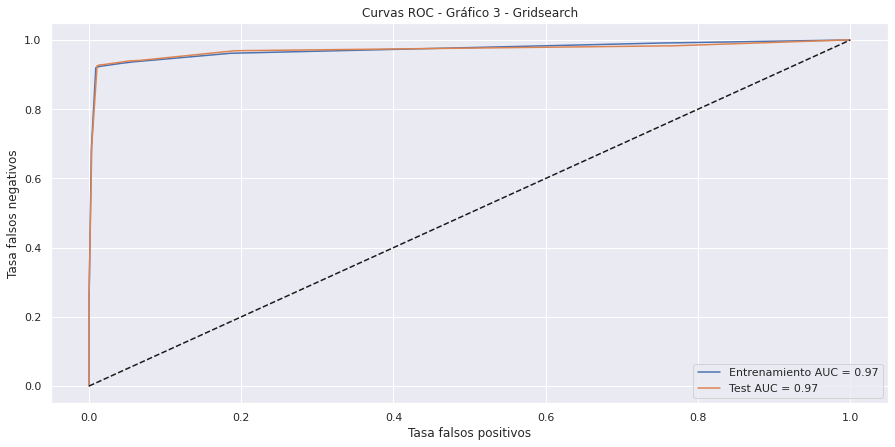

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train)[:,1]
y_test_proba = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 3 - Gridsearch')
plt.legend(loc='lower right')
plt.show()

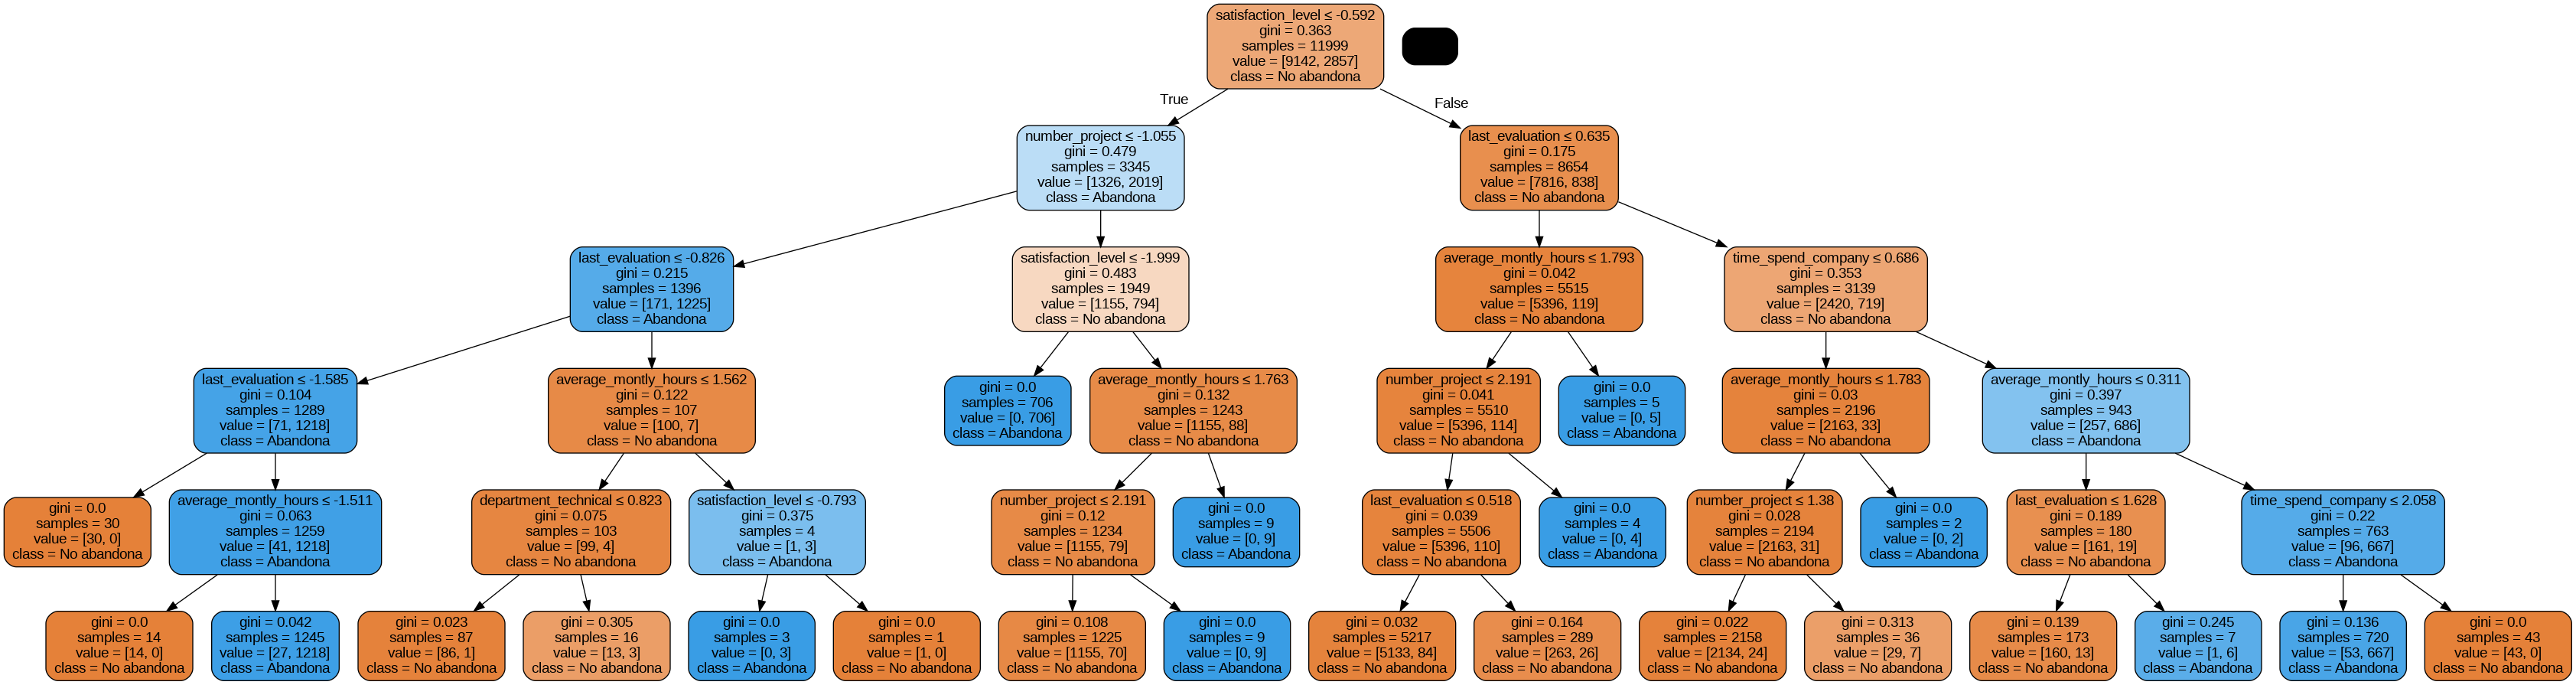

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
datos1=datos.drop("left", axis=1) #No conseguía cargar el gráfico y se me ha ocurrido esto. Ya preguntaré en el foro (o consultaré el Sprint del profesor)
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = datos1.columns ,class_names=['No abandona','Abandona'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('arbol3.png')
Image(graph.create_png())

En este caso podemos observar que nuestro modelo ha obtenido mejores resultados que en los casos anteriores. Nuestra profundidad es de 5 en este caso y podemos ver que nuestro árbol genera muchos más nodos. Es un árbol menos simple, pero no es el mismo caso que cuando no poníamos ningún hiperparámetro, no llega a ser una "caja negra" por decirlo con otras palabras. Si nos fijamos, podemos ver que tenemos el mismo gráfico que el caso 2 hasta el nivel 3, a partir de ahí nuestro gráfico sigue desarrollando nuevos nodos.

**CONCLUSIONES:**


Tanto el gráfico 2 como el gráfico 3 obtienen muy buenos resultados en las métricas. El área bajo la curva coincide en los conjuntos de entrenamiento y test en ambos modelos, con lo que podemos decir que funcionan bastante bien para generalizar nuevos datos.

Nuestro modelo con una profundidad de 5 ofrece ligeramente mejores resultados, en función de las métricas de sensibilidad, precisión, f1-score y en los valores del área bajo la curva en nuestra curva ROC.

Comparando los resultados con lo que obtuvimos en el modelo de regresión logística y KNN concluímos que obtuvimos mejores resultados con los árboles de decisión. A través de este algoritmo hemos sido capaces de comprender mejor las relaciones complejas entre cada una de las variables, además su interpretación es algo más sencilla que en los dos casos anteriores (aunque el caso de KNN no es difícil de entender). Por la documentación que he estado viendo en internet, los árboles de decisión pueden ser propensos al sobreajuste en conjuntos de datos con ruído con lo que se podrían utilizar técnicas adicionales, como la validación cruzada y la eliminación de características, para mejorar el desempeño de nuestro modelo.

Así que, vamos a probar que resultados obtenemos realizando la validación cruzada a nuestro último modelo:


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Creamos la variable objetivo y las variables explicativas
y = datos["left"]
X = datos.drop(["left"],axis=1)

# Definimos nuevamente el algoritmo al que le queremos efectuar la validación
clf = DecisionTreeClassifier(max_depth=5, criterion="gini", max_features=18)

# Realizamos la validación cruzada con 5 pliegues
scores = cross_val_score(clf, X, y, cv=5)

# Imprimimos los puntajes de cada pliegue y la puntuación media
print("Scores:", scores)
print("Mean score:", scores.mean())

Scores: [0.97566667 0.97066667 0.972      0.97366667 0.96665555]
Mean score: 0.9717311103701235


Hemos obtenido una precisión promedio alta, por lo que nuestro modelo 3 tiene un buen desempeño a la hora de clasificar los casos en los que el trabajador abandona la empresa como en los casos que no lo hace.

#### Gráfico 4 - Corrección del segundo sprint: Ampliamos la profundidad del árbol

In [ ]:
# Grid search con árboles de decisión
# Recordamos que para el caso de árboles de decisión no es necesaria la estandarización de variables
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()

max_depth_range = np.arange(2, 10)
min_samples_leaf_range = np.arange(4,20)

tree_param = [{'criterion': ['entropy', 'gini'],
               'max_depth': max_depth_range,
               'min_samples_leaf': min_samples_leaf_range}]

gs_treemodel = GridSearchCV(clf_tree,
                           tree_param,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

gs_treemodel.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_leaf': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}],
             scoring='accuracy')

In [ ]:
# Reajustar KNN usando los mejores hiperparámetros
clf_tree = tree.DecisionTreeClassifier(criterion="entropy",
                                      max_depth = 8,
                                       min_samples_leaf=4)


clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4)

In [ ]:
y_pred= clf_tree.predict(X_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[2274,   12],
       [  49,  665]])

In [ ]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.9796666666666667


In [ ]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      2286
          Sí       0.98      0.93      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Vemos que el árbol de decisión resultante de esta configuración de hiperparámetros es muy bueno en la tarea de predicción de los empleados que van a abandonar la empresa (precision = 0.99) por lo que nos quedamos con este modelo, aunqu en términos de accuracy lo haga un poco peor que el árbol sin restricciones.

Ahora procedemos a representar este árbol.

Representación visual árbol de decisión

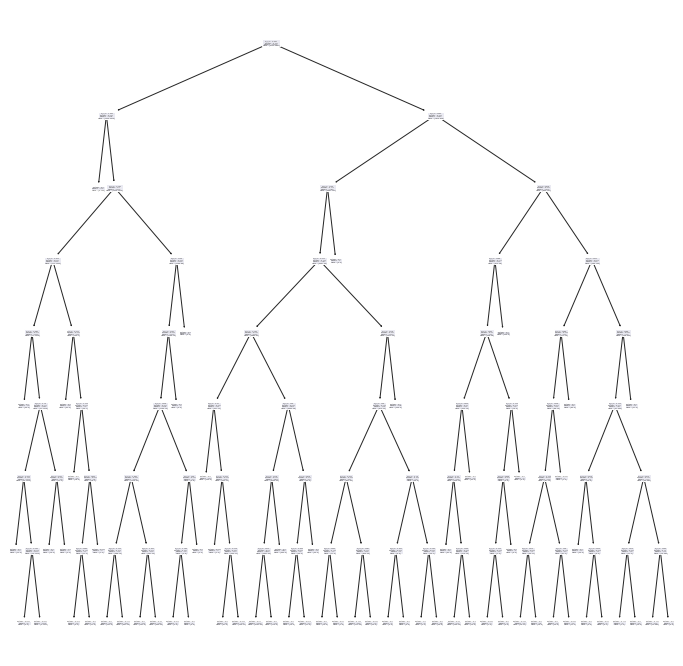

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf_tree)
plt.show()

De este árbol no se puede extraer ninguna conclusión así que recurriremos a opciones de visualización más avanzadas.

In [ ]:
feature_cols = datos.loc[:, datos.columns != "left"].columns

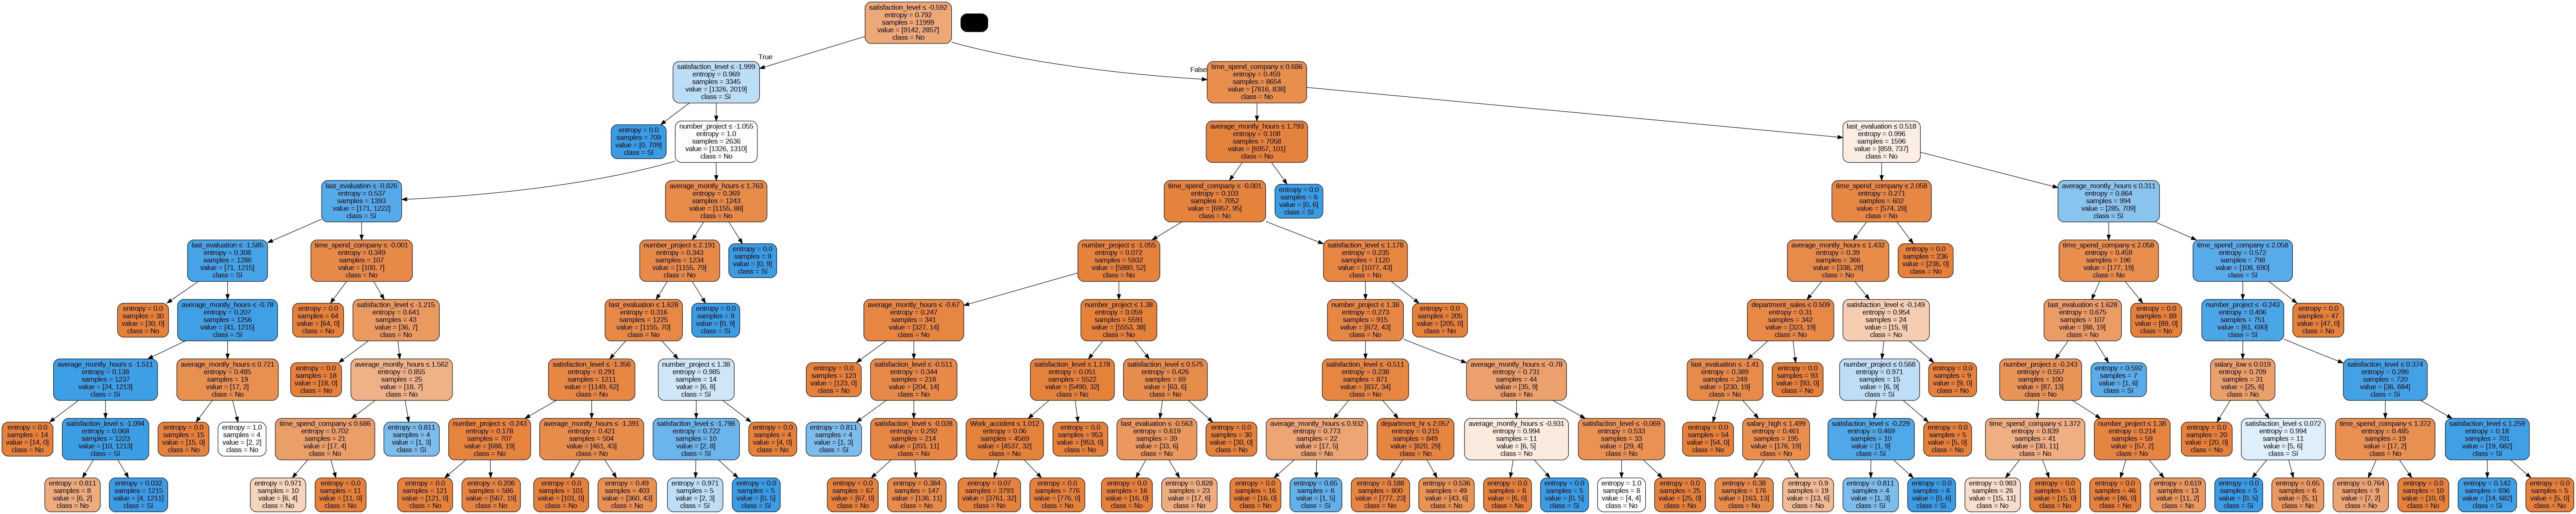

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No','Sí'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('abandono.png')
Image(graph.create_png())

Si hacemos click en la imágen anterior podemos hacer zoom para inspeccionar mejor el conjunto de reglas.

Aquellos nodos que tienen un color más oscuro, es porque dicho nodo tiene una entropía baja, es decir,  las observaciones que están en ese nodo son muy homogéneas (todas o casi todas son de la misma categoría). Por lo tanto, esos nodos son buenos discriminadores entre clases, mientras que los que tienen un color más pálido es porque tienen un valor de entropía cercano a 1 (poco poder discriminatorio).


El atributo elegido para el primer nodo es `satisfaction_level`, discriminando si su valor es inferior o superior a 0.46 aproximadamete. Posteriormente se evalúan otros atributos como `num_projects`, `last_evaluation` o `time_spent_company`.

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 3.4 MB/s eta 0:00:00


In [ ]:
#from dtreeviz.trees import dtreeviz # Cargamos el paquete
#viz = dtreeviz(clf_tree,
               #X_train,
               #y_train,
               #target_name='left',
               #feature_names=feature_cols,
               #class_names=["No","Sí"]  # necesario class_names para el clasificador
              #)

#viz

De la anterior visualización podemos ver muy claramente como se distribuyen las observaciones.


Si nos centramos en aquellos que tienen un nivel de satisfacción > 0.47, vemos que el árbol de decisión también ha descubierto el conjunto de reglas que permite discriminar al grupo de empleados que han recibido buenas valoraciones, llevan bastante tiempo en la empresa y han trabajado muchas horas, pero que <
al final han acabado la empresa, probablemente buscando nuevos retos. Este tipo de perfiles son difíciles de retener.


Reglas árbol de decisión en formato literal

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_tree, feature_names=list(feature_cols))
print(r)

|--- satisfaction_level <= -0.59
|   |--- satisfaction_level <= -2.00
|   |   |--- class: 1
|   |--- satisfaction_level >  -2.00
|   |   |--- number_project <= -1.05
|   |   |   |--- last_evaluation <= -0.83
|   |   |   |   |--- last_evaluation <= -1.59
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- last_evaluation >  -1.59
|   |   |   |   |   |--- average_montly_hours <= -0.78
|   |   |   |   |   |   |--- average_montly_hours <= -1.51
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- average_montly_hours >  -1.51
|   |   |   |   |   |   |   |--- satisfaction_level <= -1.09
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- satisfaction_level >  -1.09
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- average_montly_hours >  -0.78
|   |   |   |   |   |   |--- average_montly_hours <= 0.72
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- average_montly_hours >  0.72
|   |   |   |   |   |   

Este formato literal nos permite ver en mayor detalle cada uno de los puntos de corte y reglas creadas por el árbol.

Una regla bastante facil de identificar en este formato para predecir la clase 1 (*Sí*) es la siguiente:

*   satisfation_level < 0.47 ▶ number_project > 2.5 ▶ satisfaction_level < 0.11

Se trata de un colectivo poco satisfecho (< 0.11). Tampoco distingue mucho si la carga de trabajo es grande, pero si nos apoyamos en la visualización previa, vemos que son un colectivo con una cantidad de proyectos muy elevada (6 o 7 principalmente).


---

Descripción:

El cliente ya se encuentra más cómodo con la explicación que le hemos aportado con los árboles de decisión, y nos ha solicitado continuar por esa vía, intentando mejorar los resultados. Para ello vamos a emplear los métodos de ensemble que utilicen como modelo base los árboles de decisión.

Concretamente se pide:




## Aplicar al menos dos tipos diferentes de ensemble (uno de Bagging y otro de Boosting) de los vistos en clase, empleando como modelo base los árboles de decisión y probando con dos configuraciones de hiperparámetros diferentes para cada tipo de ensemble elegido.
Comparar y discutir los resultados, identificando el mejor ensemble en cuanto a poder predictivo.

### 1a - Bagging: Configuración 1 de hiperparámetros

Aplicaremos el algoritmo de Random Forest para nuestro problema de clasificación.

Recordamos que:

```X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, shuffle= True, random_state= 42)```

*   80% de las observaciones para train.
*   20% de las observaciones para test.

In [ ]:
#Import Random Forest clasificador
from sklearn.ensemble import RandomForestClassifier
#creamos el bosque aleatorio
clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)
#Realizamos el ajuste sobre los datos de entrenamiento
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))

Accuracy: 0.99


Con RandomForestClassifier con 100 árboles hemos obtenido un valor muy bueno en la acuracidad pero vamos a considerar otros factores (como hemos hecho en anteriores casos para evaluar completamente la calidad del modelo):

In [ ]:
predicciones = clf.predict(X_test)
print("\n La matriz de confusión es: ")
confusion_matrix(y_test,predicciones)


 La matriz de confusión es: 


array([[2283,    3],
       [  26,  688]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



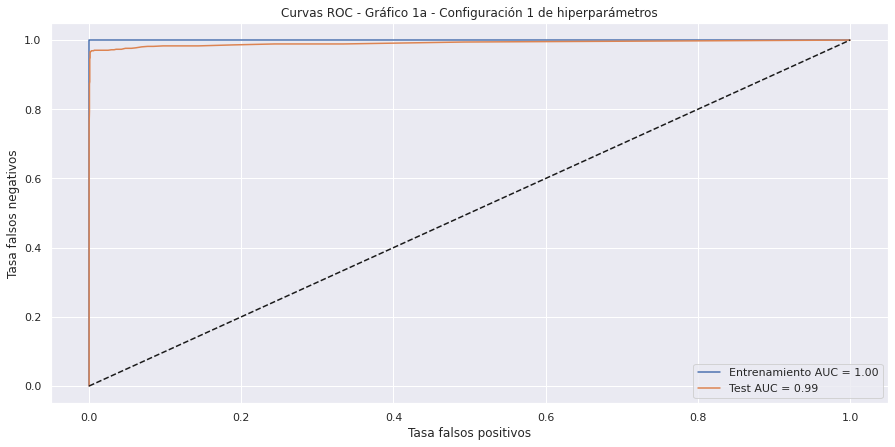

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train)[:,1]
y_test_proba = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 1 de hiperparámetros')
plt.legend(loc='lower right')
plt.show()

Podemos decir que el desempeño de nuestro modelo es muy bueno, tiene una alta precisión y sensibilidad en ambas clases y generaliza muy bien a nuevos datos. No parece que tengamos sobreajuste (a pesar de que la precisión en el conjunto de entrenamiento es perfecta AUC = 1.00) porque el AUC del conjunto de test es igual a 0.99 (1 punto porcentual de diferencia) con lo que funcionaría muy bien para predecir datos nuevos.

### 1b - Bagging: Configuración 2 de hiperparámetros: Usaremos GridSearch

In [ ]:
# Establecemos la malla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4,5,6,7,8,9,10]
}

# Creamos el modelo de Random Forest
rf = RandomForestClassifier()

# El objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, error_score="raise")

# Ajustamos el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos los resultados de la búsqueda de hiperparámetros
print('Mejores parámetros:', grid_search.best_params_)
print('Mejor puntuación:', grid_search.best_score_)

Mejores parámetros: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 1000}
Mejor puntuación: 0.976081839655412


Hemos empleado mucho tiempo para obtener el resultado anterior. Utilizaremos estos resultados para configurar nuestro siguiente modelo:

In [ ]:
#creamos el nuevo bosque aleatorio con la configuración de hiperparámetros obtenidas
clf=RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=8, min_samples_split=2)
#Realizamos el ajuste sobre los datos de entrenamiento
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9793333333333333


In [ ]:
predicciones = clf.predict(X_test)
print("\n La matriz de confusión es: ")
confusion_matrix(y_test,predicciones)


 La matriz de confusión es: 


array([[2280,    6],
       [  56,  658]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.99      0.92      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



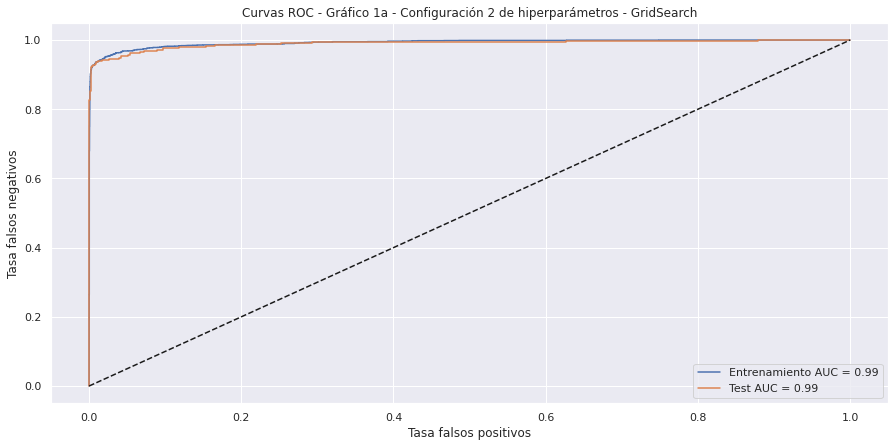

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train)[:,1]
y_test_proba = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 2 de hiperparámetros - GridSearch')
plt.legend(loc='lower right')
plt.show()

A la vista de los resultados del segundo modelo podemos sacar algunas conclusiones:

- En general es un modelo que ofrece también muy buen rendimiento con unos resultados muy buenos en todas las métricas.
- Tiene menos sobreajuste que el modelo anterior ya que el AUC en el conjunto de entrenamiento ha disminuído un poco (de 1.00 a 0.99).
- Sin embargo el rendimiento general del modelo ha disminuido ligeramente en algunas métricas. La acuracy ha pasado de 0.99 a 0.979 y la matriz de confusión muestra disminución en la precisión y la sensibilidad. Hay también un aumento de los falsos negativos, lo que indica que el modelo clasifica incorrectamente algunos casos más de las personas que abandonan la empresa, considerando que no lo hacen.
- De todas formas y como hemos visto en las clases, en función de los objetivos o de restricciones de recursos o de tiempo, puede que el segundo modelo sea preferible al anterior a pesar de que a simple vista ofrece resultados ligeramente peores. Sería el caso en el que quisiéramos ser más conservadores en nuestras predicciones y prefiriéramos un modelo que tuviera una tasa de falsos positivos y falsos negativos más restrictiva.



###2a - Boosting: Configuración 1 de hiperparámetros

Utilizaremos el clasificador AdaBoostClassifier para nuestro segundo tipo de ensemble. La elección del algoritmo se basa en que hemos visto en la clase que es adecuado para problemas de clasificación binaria, como es nuestro caso.

En el caso 2b intentaremos optimizar los parámetros, pero más tarde probaremos con otros algoritmos de bagging para ver qué tal se comportan.

AdaBoostClassiffier:

In [ ]:
## Importamos librerias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
from sklearn.model_selection import train_test_split

# Creamos la variable objetivo y las variables explicativas

y = datos["left"]
X = datos.drop(["left"],axis=1)

# Creamos los diferentes conjuntos

from sklearn.model_selection import train_test_split

# Elegimos el 20% de los datos para test y random_state=42 por convención
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, shuffle= True, random_state= 42)

In [ ]:
## Adaptador Adaboost
bdt_real=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                            n_estimators=600,learning_rate=1)
# El clasificador débil es un árbol de decisiones que produce 600 clasificadores débiles
bdt_real.fit(X_train,y_train)
n_tree=len(bdt_real)
print("El número de árboles empleados en el ensemble es: ", n_tree) # El número de árboles es 600

El número de árboles empleados en el ensemble es:  600


In [ ]:
## Precisión promedio de predicción del clasificador
scores=cross_val_score(bdt_real,X_test,y_test)
print("Precisión media de la predicción del clasificador:",scores.mean())

Precisión media de la predicción del clasificador: 0.9743333333333334


In [ ]:
# Predecir las etiquetas de clase para los datos de prueba
y_pred = bdt_real.predict(X_test)

# Imprimir el informe de clasificación
print("Classification report: \n\n",classification_report(y_test, y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.98      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
y_pred = bdt_real.predict(X_test)
print("La matriz de confusión es: \n")
cm = confusion_matrix(y_test, y_pred)

print(cm)

La matriz de confusión es: 

[[2275   11]
 [  26  688]]


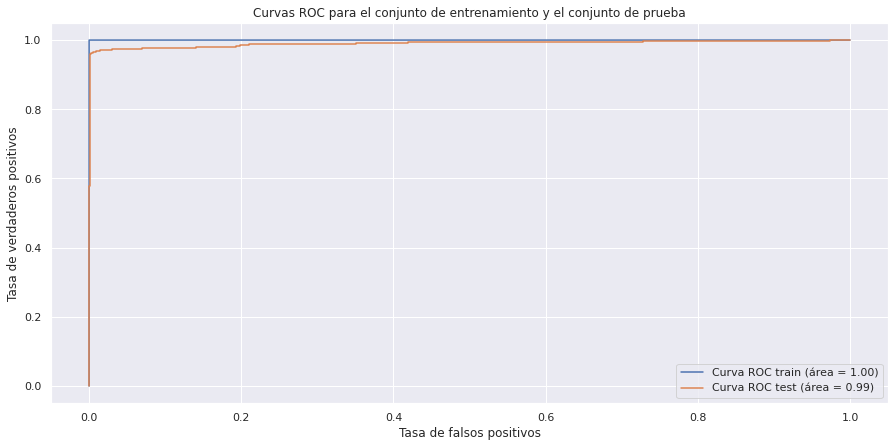

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas
y_scores_train = bdt_real.decision_function(X_train)
y_scores_test = bdt_real.decision_function(X_test)

# Obtener las tasas de falsos positivos y verdaderos positivos para train y test
fpr_train, tpr_train, _ = roc_curve(y_train, y_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar ambas curvas ROC
plt.plot(fpr_train, tpr_train, label='Curva ROC train (área = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Curva ROC test (área = %0.2f)' % roc_auc_test)

# Agregar títulos y etiquetas
plt.title('Curvas ROC para el conjunto de entrenamiento y el conjunto de prueba')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

Obtenemos unos resultados muy buenos en todas las métricas. El modelo acierta el 97% de las predicciones, la precisión y la sensibilidad son altas al igual que el f1-score.

En la matriz de confusión vemos cómo ha acertado nuestro modelo en la mayoría de los casos, con 8 casos que el modelo identifica que han abandonado la empresa y no lo han hecho (falsos positivos) y 26 que han dejado la empresa y el modelo ha predicho que no lo hacían.

Nuestra curva ROC tiene unos buenísimos resultados, por lo que indica que el modelo tiene buen rendimiento.

### 2b - Boosting: Configuración 2 de hiperparámetros: Usaremos RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Establecemos la malla de hiperparámetros con distribuciones para realizar la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(50, 1001),
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': list(range(1, 11))

}

# Creamos el modelo de árbol de decisión
dt = DecisionTreeClassifier()

# Creamos el modelo de Adaboost y pasamos el árbol de decisión como base_estimator
adaboost = AdaBoostClassifier(base_estimator=dt)

# El objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist, cv=5, n_jobs=-1, n_iter=20, random_state=42, error_score="raise")

# Ajustamos el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtenemos los resultados de la búsqueda de hiperparámetros
print('Mejores parámetros:', random_search.best_params_)
print('Mejor puntuación:', random_search.best_score_)

Mejores parámetros: {'base_estimator__max_depth': 7, 'learning_rate': 0.01, 'n_estimators': 320}
Mejor puntuación: 0.9893327775461997


Utilizamos la configuración obtenida con RandomSearch:

In [ ]:
# Adaptador Adaboost
bdt_real=AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),
                            n_estimators=241,learning_rate=0.1)
# El clasificador débil es un árbol de decisiones que produce 241 clasificadores débiles
bdt_real.fit(X_train,y_train)
n_tree=len(bdt_real)
print("El número de árboles empleados en el ensemble es: ", n_tree)

El número de árboles empleados en el ensemble es:  241


In [ ]:
## Precisión promedio de predicción del clasificador
scores=cross_val_score(bdt_real,X_test,y_test)
print("Precisión media de la predicción del clasificador:",scores.mean())

Precisión media de la predicción del clasificador: 0.9716666666666667


In [ ]:
# Predecir las etiquetas de clase para los datos de prueba
y_pred = bdt_real.predict(X_test)

# Imprimir el informe de clasificación
print("Classification report: \n\n",classification_report(y_test, y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [ ]:
y_pred = bdt_real.predict(X_test)
print("La matriz de confusión es: \n")
cm = confusion_matrix(y_test, y_pred)

print(cm)

La matriz de confusión es: 

[[2282    4]
 [  25  689]]


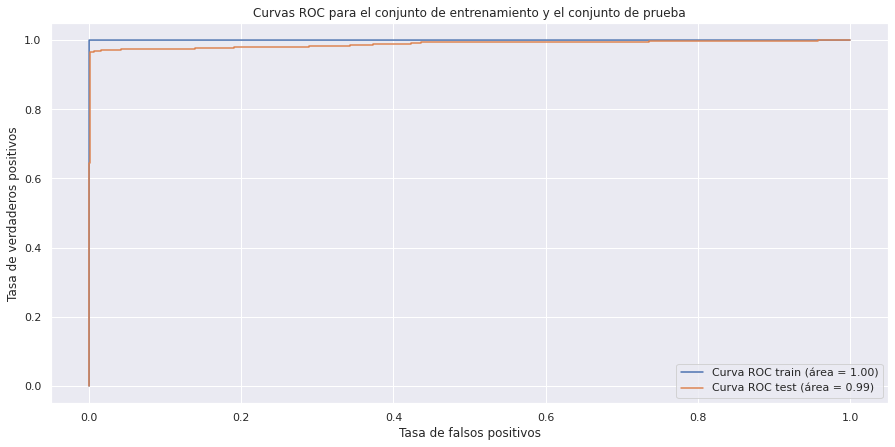

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas
y_scores_train = bdt_real.decision_function(X_train)
y_scores_test = bdt_real.decision_function(X_test)

# Obtener las tasas de falsos positivos y verdaderos positivos para train y test
fpr_train, tpr_train, _ = roc_curve(y_train, y_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar ambas curvas ROC
plt.plot(fpr_train, tpr_train, label='Curva ROC train (área = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Curva ROC test (área = %0.2f)' % roc_auc_test)

# Agregar títulos y etiquetas
plt.title('Curvas ROC para el conjunto de entrenamiento y el conjunto de prueba')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

Al igual que en el caso de 2a de Boosting, hemos obtenido muy buenos resultados:

- Nuestras métricas tienen unos valores muy buenos a pesar de que en este caso hemos utilizado un valor bajo de learning rate (0.1 frente a 1 del caso anterior). Estamos reduciendo la influencia de cada clasificador en el proceso de entrenamiento.
- Las métricas son muy parecidas. Podemos señalar diferencias muy sutiles entre uno y otro, pero en términos generales, ambos modelos tienen precisión,sensibilidad, f1-score y resultados en la Curva ROC y el AUC prácticamente idénticos, son bastante buenos en la tarea de clasificación.

##Obtención de las variables más relevantes del modelo. ¿Tiene sentido que sean las variables con mayor peso?

Vamos a ver ahora la importancia de cada variable para el modelo entrenado:

In [ ]:
for name, importancia in zip(datos.columns,clf.feature_importances_):
    print(name, importancia)

satisfaction_level 0.3260014937768597
last_evaluation 0.11415563757737204
number_project 0.19989816829226092
average_montly_hours 0.14609585711456738
time_spend_company 0.17961404939752962
Work_accident 0.011260282599483945
left 0.0012274994998598525
promotion_last_5years 0.0004818349806543866
department_IT 0.0010042933895739947
department_RandD 0.000544781792350067
department_accounting 0.0007246804900850206
department_hr 0.0007167778141146585
department_management 0.0002703138536907768
department_marketing 0.00042297329951258584
department_product_mng 0.0010218908573534106
department_sales 0.0007575703370505633
department_support 0.0012200117757414583
department_technical 0.005672278512286613
salary_high 0.00660226597560574
salary_low 0.0023073386640471974


Podemos verlo gráficamente de la siguiente manera:

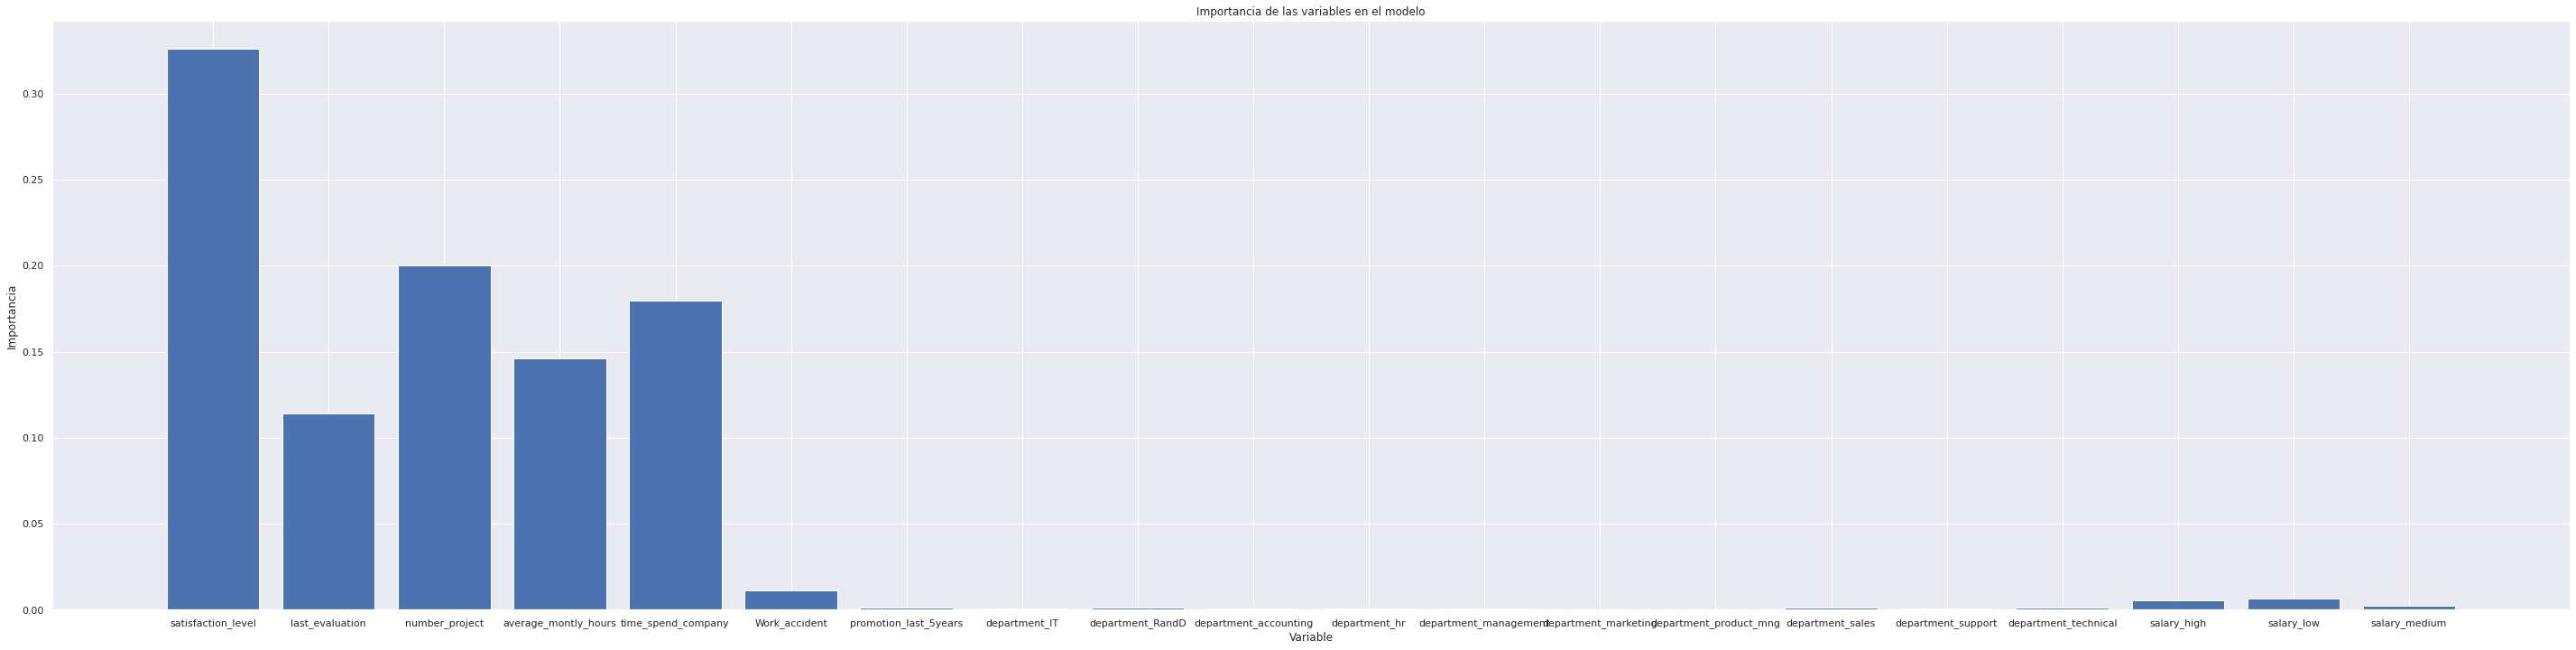

In [ ]:
# Obtener las importancias de las variables
importancias = clf.feature_importances_

# Obtener los nombres de las variables
nombres_variables = datos.columns.tolist()
nombres_variables.remove('left')
# Crear un gráfico de barras
fig = plt.figure(figsize=(50, 12))
plt.bar(nombres_variables, importancias)

# Agregar etiquetas y títulos
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo')

# Mostrar el gráfico
plt.show()

Podemos observar 5 variables con más importancia en nuestro modelo y tiene sentido que estas sean las 5 que más influyan:
- Satisfaction_level - A más satisfacción de los empleados es más probable que se queden en la empresa, de igual modo, si no están satisfechos son más propensos a abandonarlas. Por lo tanto, tiene lógica que esta variable explicativa sea la que más influye en nuestro target.
- Last_evaluation - El desempeño del trabajador en función del empleador. La percepción por parte del empleador es determinante tanto para el caso de una evaluación negativa (no se sienta valorado y quiera abandonar), como en caso positivo (que se sienta valorado y satisfecho con su empleo).
- Number_project - Si un empleado tiene muchos proyectos puede sentirse estresado y considerar buscar otro empleo.
- Average_monthly_hour - De igual modo una cantidad de horas elevada puede ocasionar lo mismo que en la variable anterior.
- Time_spend_company - Puede que afecte por el hecho de que el trabajador quiera buscar nuevas experiencias y motivaciones fuera de la empresa.



##PARTE OPCIONAL: utiliza para algún método de ensemble que lo permita (AdaBoostClassifier, BaggingClassifier, etc.)  un modelo base diferente a los árboles de decisión y estudiar la influencia que tiene en los resultados, así como en la varianza y sesgo.

Vamos en AdaBoostClassifier a probar con algunos modelos bases diferentes:

### Regresión logística:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
base_model = LogisticRegression()

# Crear el clasificador AdaBoost
adaboost_model = AdaBoostClassifier(base_estimator=base_model)

# Entrenar el modelo
adaboost_model.fit(X_train, y_train)

# Predecir sobre los datos de test
y_pred = adaboost_model.predict(X_test)

In [ ]:
# 1. Precisión media de la predicción del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión media: {:.2f}".format(accuracy))

Precisión media: 0.76


In [ ]:
# 2. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[2194   92]
 [ 623   91]]


In [ ]:
# 3. Classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2286
           1       0.50      0.13      0.20       714

    accuracy                           0.76      3000
   macro avg       0.64      0.54      0.53      3000
weighted avg       0.71      0.76      0.70      3000



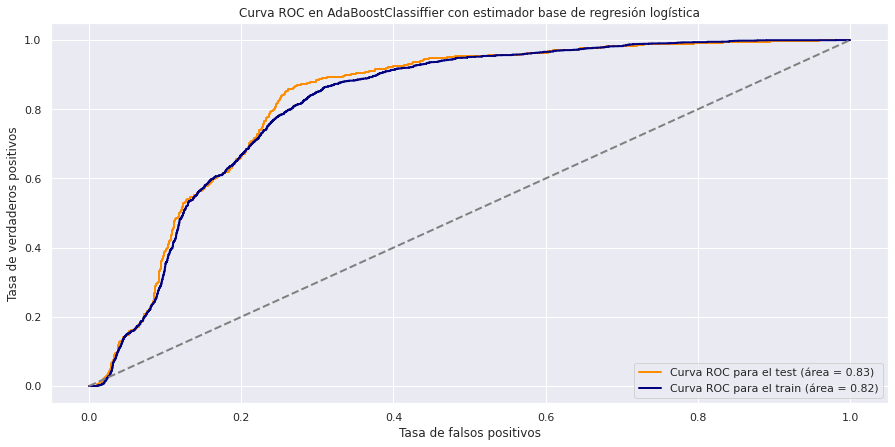

In [ ]:
# 4. Curvas ROC para train y test
y_pred_proba = adaboost_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

train_y_pred_proba = adaboost_model.predict_proba(X_train)[:,1]
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_y_pred_proba)

roc_auc = auc(fpr, tpr)
train_roc_auc = auc(train_fpr, train_tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC para el test (área = %0.2f)' % roc_auc)
plt.plot(train_fpr, train_tpr, color='navy', lw=2, label='Curva ROC para el train (área = %0.2f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC en AdaBoostClassiffier con estimador base de regresión logística')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 5. Varianza y sesgo
scores = cross_val_score(adaboost_model, X_train, y_train, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.01)


Conclusiones:
- Vemos que hemos obtenido peores resultados. Hemos utilizado primero este algoritmo porque queríamos ver cómo se comportaba en nuestro modelo de clasificación binaria. Logistic regresión presenta dificultades al ser un modelo lineal.
- Los árboles de decisión son capaces de capturar mejor las relaciones no lineales entre las variables predictoras, así que el modelo en AdaBoost parece mucho más efectivo en ese caso.

### SVM

He querido probar con SVM, pero previamente no he conseguido cargar el modelo porque tardaba mucho tiempo debido a la complejidad del algoritmo. Así que he intentado utilizar las características más relevantes que hemos obtenido antes. De todas formas no he conseguido cargarlo, intento con nuevo algoritmo.

In [ ]:
from sklearn.model_selection import train_test_split

# Creamos la variable objetivo y las variables explicativas

y = datos["left"]
X = datos[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

# Creamos los diferentes conjuntos

from sklearn.model_selection import train_test_split

# Elegimos el 20% de los datos para test y random_state=42 por convención
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, shuffle= True, random_state= 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Crear un modelo de regresión logística
base_model = SVC(probability=True)

# Crear el clasificador AdaBoost
adaboost_model = AdaBoostClassifier(base_estimator=base_model)

# Entrenar el modelo
adaboost_model.fit(X_train, y_train)

# Predecir sobre los datos de test
y_pred = adaboost_model.predict(X_test)

##Conclusión final: Mejor ensemble en cuanto a poder predictivo



En la documentación de las clases hemos visto que AdaBoost es sensible al ruído, al contrario de Random Forest que es más robusto ante los datos ruidosos y atípicos y que tiene buena capacidad de generalización. En nuestro modelo, puede que haya funcionado mejor que AdaBoost debido a estas circunstancias.  

En vista de los resultados obtenidos, hemos visto que el modelo que mejor funcionaba y que obtenía mejores métricas eran los casos de 1a - Bagging y 1b - Bagging, con Random Forest (árboles aleatorios).

# FASE 4

Mejorar los resultados del proyecto aplicando técnicas de búsqueda exhaustiva (**Grid Search**) o búsqueda aleatoria (**Random Search**), y estudio de la simplificación del modelo final elegido, utilizando la información que nos aporta la importancia de los atributos (feature_importance) de los algoritmos de tipo combinación de clasificadores (Ensembles).
En concreto se pide lo siguiente:

Partiendo de la información obtenida en el sprint 3 sobre las variables más importantes para el modelo de conjunto elegido, re-entrenar dicho modelo utilizando las variables más importantes y discutir las diferencias apreciadas tanto en calidad de las predicciones como en velocidad de entrenamiento.

---
Como hemos visto en la parte final del Sprint 3, hemos obtenido 5 variables que tenían una relevancia diferenciada a la hora de servir como variables explicativas de nuestro modelo.


In [ ]:
for name, importancia in zip(datos.columns,clf.feature_importances_):
    print(name, importancia)

satisfaction_level 0.330203005204065
last_evaluation 0.11209371973157552
number_project 0.20546072424596903
average_montly_hours 0.14277016380664934
time_spend_company 0.17578095524434847
Work_accident 0.010925306493591972
left 0.001187839963413587
promotion_last_5years 0.00046075499251711137
department_IT 0.0009603638451795809
department_RandD 0.000488038782284053
department_accounting 0.0006742159519007718
department_hr 0.0007438930779685902
department_management 0.00028633641098284296
department_marketing 0.00036597067311699695
department_product_mng 0.0009433457202924163
department_sales 0.0007217787855151824
department_support 0.0012242486080428696
department_technical 0.005320053053515454
salary_high 0.0072836598335825386
salary_low 0.0021056255754886397


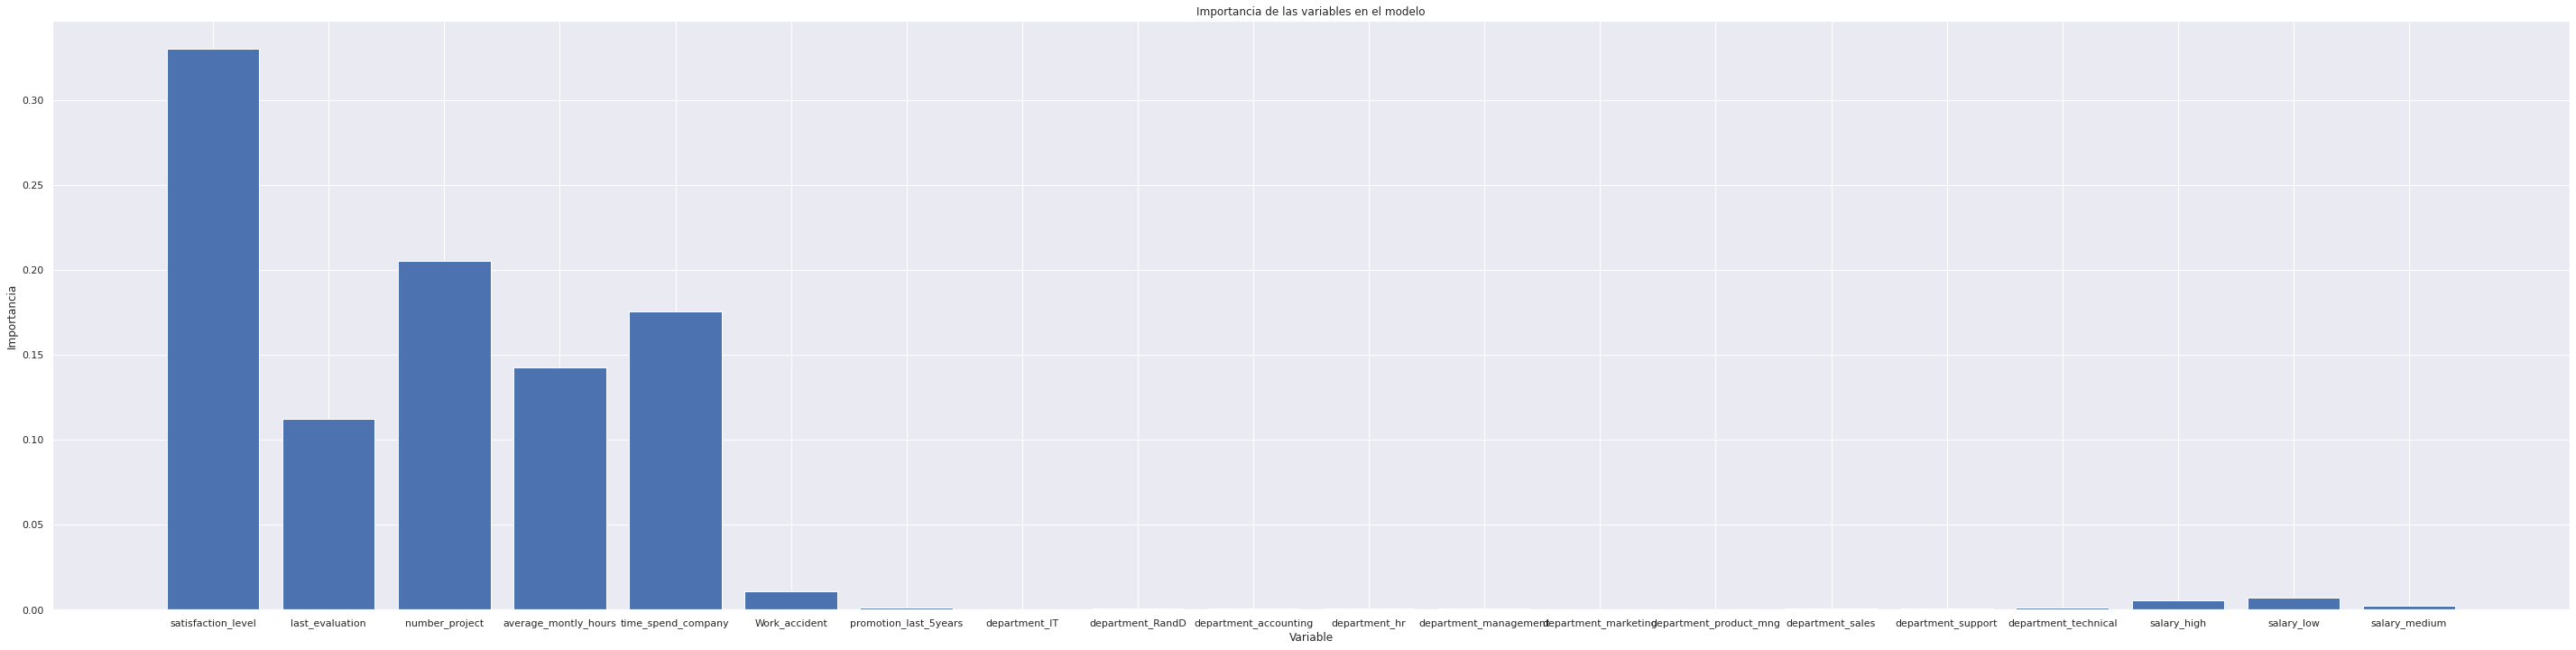

In [ ]:
# Obtener las importancias de las variables
importancias = clf.feature_importances_

# Obtener los nombres de las variables
nombres_variables = datos.columns.tolist()
nombres_variables.remove('left')
# Crear un gráfico de barras
fig = plt.figure(figsize=(50, 12))
plt.bar(nombres_variables, importancias)

# Agregar etiquetas y títulos
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo')

# Mostrar el gráfico
plt.show()

## Modelo con 5 variables

Ahora vamos a reentrenar el modelo con el que mejores resultados obtuvimos en el Sprint anterior (Random Forest) con las 5 variables que se encuentran a la izquierda de nuestro gráfico:

**'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'**

En primer lugar, vamos a calcular la suma de las importancias de nuestras 5 variables para ver qué relevancia o, dicho de otra manera, qué capacidad tienen para explicar nuestro modelo en términos porcentuales:

In [ ]:
variables_de_interes = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
suma = 0
for variable in variables_de_interes:
    indice = datos.columns.get_loc(variable)
    importancia = clf.feature_importances_[indice]
    suma += importancia
    print(f"{variable}: {importancia}")
print(f"Suma total: {suma}")

satisfaction_level: 0.3260014937768597
last_evaluation: 0.11415563757737204
number_project: 0.19989816829226092
average_montly_hours: 0.14609585711456738
time_spend_company: 0.17961404939752962
Suma total: 0.9657652061585897


Como podemos observar, nuestras 5 variables elegidas son las que mejor explican el modelo y no incluiremos el resto en nuestro análisis.

In [ ]:
from sklearn.model_selection import train_test_split

# Creamos la variable objetivo y las variables explicativas

y_5var = datos["left"]
X_5var = datos[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

# Creamos los diferentes conjuntos

from sklearn.model_selection import train_test_split

# Elegimos el 20% de los datos para test y random_state=42 por convención
X_train_5var, X_test_5var, y_train_5var, y_test_5var= train_test_split(X_5var, y_5var, test_size= 0.2, stratify=y, shuffle= True, random_state= 42)

In [ ]:
#Import Random Forest clasificador
from sklearn.ensemble import RandomForestClassifier
#creamos el bosque aleatorio
clf=RandomForestClassifier(n_estimators=100, n_jobs=-1)
#Realizamos el ajuste sobre los datos de entrenamiento
clf.fit(X_train_5var,y_train_5var)

y_pred_5var=clf.predict(X_test_5var)

In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test_5var, y_pred_5var))

Accuracy: 0.9903333333333333


In [ ]:
predicciones = clf.predict(X_test_5var)
print("\n La matriz de confusión es: ")
confusion_matrix(y_test_5var,predicciones)


 La matriz de confusión es: 


array([[2280,    6],
       [  23,  691]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test_5var,y_pred_5var))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



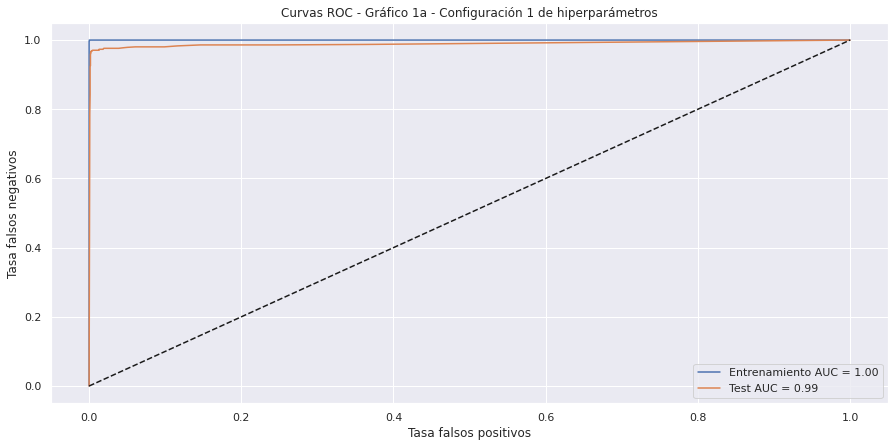

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train_5var)[:,1]
y_test_proba = clf.predict_proba(X_test_5var)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_5var, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_5var, y_test_proba)

train_auc = roc_auc_score(y_train_5var, y_train_proba)
test_auc = roc_auc_score(y_test_5var, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 1 de hiperparámetros')
plt.legend(loc='lower right')
plt.show()

Como podemos ver en los resultados de las métricas obtenemos prácticamente resultados idénticos que en el modelo 1a - Bagging - Randon Forest. Todas y cada una de las métricas son prácticamente iguales, lo que nos lleva a determinar con qué grado de relevancia estas 5 variables explicaban nuestro modelo.

Podemos llegar a la conclusión de que estas 5 variables tienen una contribución significativa para explicar nuestro modelo en comparación con las demás variables, dado que su contribución es casi completa.

---


Sin embargo vamos a señalar esas ligeras diferencias:

- Modelo Random Forest con todas las variables

```
Matriz de confusión:
    ([[2282,    4],
       [  26,  688]])

Y el Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000
```
- Modelo Random Forest con 5 variables

```
Matriz de confusión:
     ([[2280,    6],
       [  23,  691]])

Y el Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

```

Aunque ligerísimas, notamos que nuestras matrices de confusión no tienen los mismos valores. El modelo con 5 variables llega incluso a predecir mejor los casos en que una persona abandona nuestra empresa (691 frente a 688), a continuación, el recall (proporción para verdaderos positivos) así lo muestra (0.97 frente a 0.96 del anterior).

Por lo demás, en ambos casos tenemos los mismos resultados en nuestra curva ROC con el área de train y test bajo la curva prácticamente idénticas. Ambos modelos generalizan muy bien a datos nuevos y no tenemos sobreajuste (0.01 de diferencia entre AUC de train y test).

Nuestras 5 variables son altamente informativas para predecir nuestro caso de abandono de la empresa por parte del trabajador y obtenemos idénticos resultados en el modelo que estamos trabajando mejorando su simplicidad y eficiencia.


## Optimización de nuestro modelo con *RandomizedSearchCV*:

En el Sprint 3 utilizamos la clase *GridSearchCV y RandomizedSearchCV* para encontrar la combinación que optimizara nuestros modelos. Ahora vamos a hacer lo mismo pero para nuestro nuevo modelo con 5 variables y realizaremos un análisis sobre las diferencias apreciadas tanto en la calidad de las predicciones como en la velocidad del entrenamiento. No veo necesario para la entrega extenderme con las dos clases nuevamente, usaré solo para el ejemplo la clase ***RandomizedSearchCV***:


In [ ]:
# Definimos una malla de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Definimos el modelo
clf = RandomForestClassifier(random_state=42)

# El RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)

# Entrenamos nuestro modelo con RandomizedSearchCV
random_search.fit(X_train_5var, y_train_5var)

# Obtenemos los mejores parámetros para meterlos luego en mi variable
best_params = random_search.best_params_

print('Mejores parámetros:', random_search.best_params_)
print('Mejor puntuación:', random_search.best_score_)


Mejores parámetros: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 158}
Mejor puntuación: 0.9946491602603427


In [ ]:
# Entrenamos el modelo con mejores parámetros
clf = RandomForestClassifier(random_state=42, **best_params)
clf.fit(X_train_5var, y_train_5var)

# Hacemos las predicciones
y_pred_5var = clf.predict(X_test_5var)

In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test_5var, y_pred_5var))

Accuracy: 0.988


In [ ]:
predicciones = clf.predict(X_test_5var)
print("\n La matriz de confusión es: ")
confusion_matrix(y_test_5var,predicciones)


 La matriz de confusión es: 


array([[2280,    6],
       [  30,  684]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test_5var,y_pred_5var))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



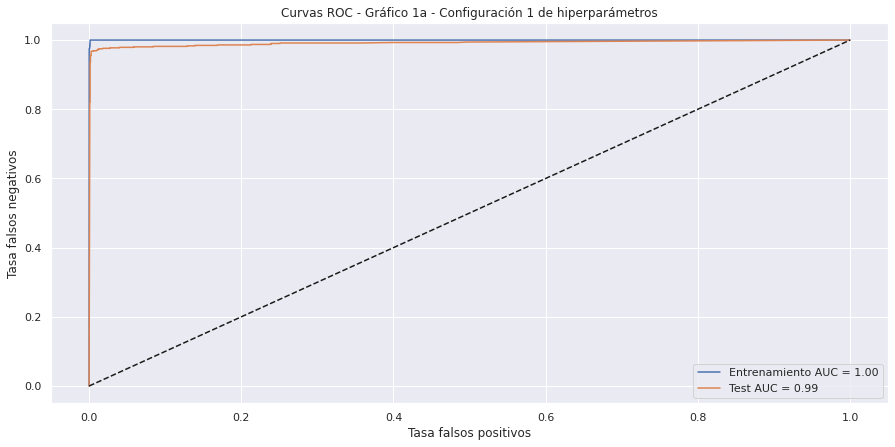

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train_5var)[:,1]
y_test_proba = clf.predict_proba(X_test_5var)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_5var, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_5var, y_test_proba)

train_auc = roc_auc_score(y_train_5var, y_train_proba)
test_auc = roc_auc_score(y_test_5var, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 1 de hiperparámetros')
plt.legend(loc='lower right')
plt.show()

Nuevamente obtenemos unos resultados muy buenos. Si analizamos por detalle cada una de las métricas observamos que los resultados son prácticamente idénticos nuevamente con ligeras diferencias aquí y allá.

Algo que me parece destacable es que a pesar de que he usado RandomSearch y ha calculado un conjunto de posibles combinaciones para optimizar el modelo no ha superado en términos de acuracidad a mi modelo anterior. ¿A qué se debe esto?

En el Sprint anterior realicé un comentario sobre esta cuestión, porque cuando efectuaba el GridSearch para mi modelo de RandomForest me sucedía esto mismo. Posteriormente he visto que en mi entrega del sprint no aparecían los comentarios que hice al margen. Quería separar la entrega del notebook de las posibles dudas que podía tener, por lo que hice algunas preguntas en forma de comentarios, no sé por qué no se guardaron, fallo mío. Sin embargo, al final creo que conseguí resolver esta cuestión aunque la semana anterior no tenía muy claro el porqué.

Por un lado está el propio azar. El modelo varía ligeramente cada vez que se ejecuta. En una pregunta en los foros un alumno preguntaba esto mismo y es lógico pensar que sucede de esta manera, no siempre guardará los mismos conjuntos de entrenamiento o test. Por lo que por un lado podemos decir que el mismo azar interviene cada vez que ejecutamos el modelo. Se pueden ejecutar varias veces y para el caso que nos ocupa, al ser tan parejos ambos modelos, puede que haya un resultado diferente.

Por otro lado, aunque en ocasiones se considere que estamos optimizando la búsqueda de hiperparámetros es posible que introduzcamos limitaciones. Eso era justamente lo que me sucedía a mí en el caso de 1b - Bagging. Al introducir un rango en algunos hiperparámetros en algunos casos estoy introduciendo restricciones, por lo que puede que al usar GridSearch o RandomSearch, como hemos hecho precisamente en este caso, obtengamos unos resultados no tan buenos.

Y por último, la naturaleza del proceso de bagging en sí, ya que resulta posible estimar el error de test sin recurrir a métodos costosos para la optimización de los hiperparámetros. Random Forest utiliza un conjunto de árboles de decisión para producir una predicción final, empleamos muestras por bootstrap y como la variable respuesta de cada observación se predice empleando únicamente los arboles en cuyo ajuste no participa esa misma observación, el Out of bag - classification error sirve como estimación del error de test(Random Forest python. - Out-of-Bag Error (s. f.). https://www.cienciadedatos.net/documentos/py08_random_forest_python.html). Por lo que efectuar la optimización no siempre es efectivo.

---

**Conclusiones sobre las diferencias apreciadas:**

- Velocidad de ejecución:

He visto que es posible introducir en el código algunas funciones y módulos para medir el tiempo de ejecución de la celda. Me imagino que no es necesario hacerlo, ya que también aparece al margen.

Se reduce considerablemente el tiempo de ejecución. Tardé más de 30 minutos en obtener la configuración de los hiperparámetros en GridSearch y RandomSearch en el Sprint 3 y ahora he tardado 3 minutos. Con lo que se reduce el coste computacional. Me imagino que en casos de conjuntos mucho más grandes y más complejos este hecho es determinante.

- Calidad de las predicciones:

Para el modelo que he decidido utilizar (RandomForest) la calidad de las predicciones no sufre muchas variaciones. Las variables elegidas explican con mucha eficiencia a nuestra variable objetivo y hemos obtenido resultados muy similares sólo con 5 variables del total.

Para nuestro conjunto de datos no hemos encontrado overfitting cuando utilizábamos el RandomForest con todas las variables. Los resultados de nuestra curva ROC eran prácticamente idénticos tanto en train como en test por lo que predecía muy bien para datos nuevos. Si hubiéramos tenido problemas de este tipo, seguramente al reducir la complejidad del modelo con menos variables hubiéramos reducido también la probabilidad de que se ajuste demasiado a los datos de entrenamiento, sin embargo, no ha sido determinante con nuestro conjunto de datos.

- Multicolinealidad:

Hemos visto en nuestra gráfica de correlación entre variables los resultados de las variables entre sí. A pesar de que el número de proyectos, la media de horas mensuales y la evaluación por parte del empleador eran las variables que presentaban una correlación lineal más alta, esta no era significativa y no hemos tenido problemas en ninguno de nuestros modelos. La reducción de variables es una ventaja en este tipo de situaciones, pero en nuestro modelo no hemos tenido problemas de este tipo y no se han visto afectadas nuestras predicciones.


### Fase adicional

Probar alguna técnica de muestreo para el manejo del balanceo de las clases (under-sampling, over-sampling, etc.) y comprobar si mejoran o empeoran los resultados obtenidos por el mejor modelo seleccionado en los sprints anteriores.   

- Vamos a probar los dos tipos:

a) Oversampling - Duplicar las muestras de la clase minoritaria

b) Undersampling - Eliminamos datos de la clase mayoritaria

### Oversampling

En el enlace Web muestran dos técnicas diferentes para esto:

(i) la técnica de sobremuestreo de minorías sintéticas (SMOTE)

(ii) el método de muestreo sintético adaptativo (ADASYN)

Usaré la primera y sólo en la clase de entrenamiento:

In [ ]:
from imblearn.over_sampling import SMOTE

# Realizamos el oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_5var, y_train_5var)

# Entrenamos el modelo
clf.fit(X_train_resampled, y_train_resampled)

# Realizamos las predicciones en el conjunto de prueba
y_pred_5var = clf.predict(X_test_5var)

In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test_5var, y_pred_5var))

Accuracy: 0.9873333333333333


In [ ]:
print("\n La matriz de confusión es: ")
confusion_matrix(y_test_5var,y_pred_5var)


 La matriz de confusión es: 


array([[2273,   13],
       [  25,  689]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test_5var,y_pred_5var))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



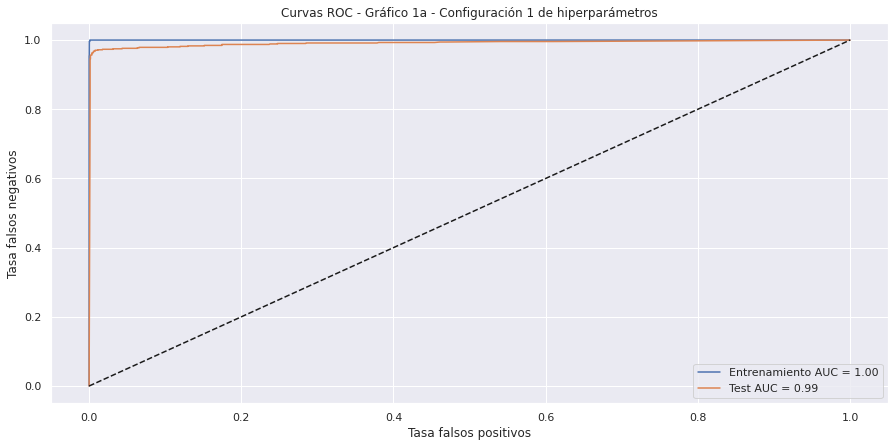

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train_resampled)[:,1]
y_test_proba = clf.predict_proba(X_test_5var)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_5var, y_test_proba)

train_auc = roc_auc_score(y_train_resampled, y_train_proba)
test_auc = roc_auc_score(y_test_5var, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 1 de hiperparámetros')
plt.legend(loc='lower right')
plt.show()

Veamos los resultados con ambos modelos:

Modelo Random Forest con 5 variables:

```
Accuracy: 0.9903333333333333

```
```
 La matriz de confusión es:
array([[2280,    6],
       [  23,  691]])

```
```
Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

```
Modelo con oversampling:
```
Accuracy: 0.9873333333333333

```
```
 La matriz de confusión es:
array([[2273,   13],
       [  25,  689]])

```
```
Classification report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

```

Pues podemos decir que hemos obtenido buenos resultados, nuestro modelo obtiene métricas muy buenas y el área bajo la curva en los conjuntos de entrenamiento y test en ambos modelos son prácticamente idénticas. Sin embargo no hemos obtenido mejores resultados. Como se puede observar en todas las métricas obtenemos un valor ligeramente inferior (precisión, sensibilidad y f1-score)

Vamos a hacer ahora el undersampling:


### Undersampling

Usaremos ```ClusterCentroids``` del ejemplo de la web que utiliza K-means para reducir las muestras:

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_train_under, y_train_under = cc.fit_resample(X_train_5var, y_train_5var)

# Entrenar modelo con datos submuestreados
clf.fit(X_train_under, y_train_under)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_5var)


In [ ]:
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test_5var, y_pred))

Accuracy: 0.9853333333333333


In [ ]:
print("\n La matriz de confusión es: ")
confusion_matrix(y_test_5var,y_pred)


 La matriz de confusión es: 


array([[2268,   18],
       [  26,  688]])

In [ ]:
print("Classification report: \n\n",classification_report(y_test_5var,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



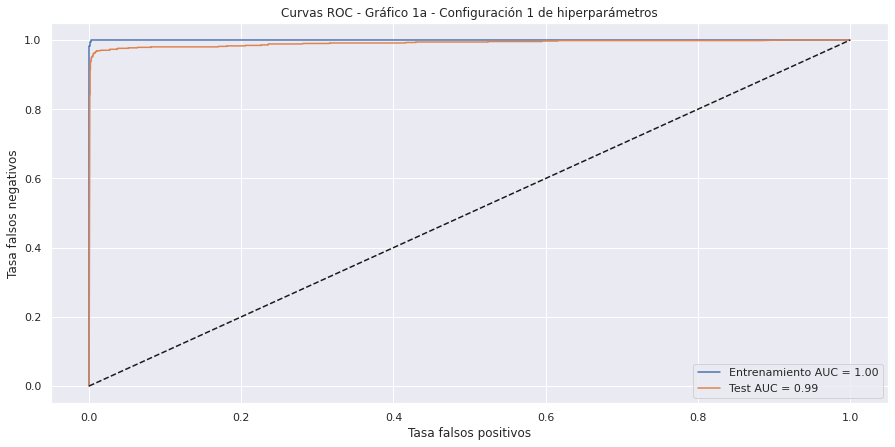

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_train_proba = clf.predict_proba(X_train_under)[:,1]
y_test_proba = clf.predict_proba(X_test_5var)[:,1]

# Calcular la curva ROC y el AUC para el conjunto de entrenamiento y prueba
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_under, y_train_proba)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_5var, y_test_proba)

train_auc = roc_auc_score(y_train_under, y_train_proba)
test_auc = roc_auc_score(y_test_5var, y_test_proba)

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.plot(train_fpr, train_tpr, label='Entrenamiento AUC = {:.2f}'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test AUC = {:.2f}'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa falsos negativos')
plt.title('Curvas ROC - Gráfico 1a - Configuración 1 de hiperparámetros')
plt.legend(loc='lower right')
plt.show()

Veamos los resultados con ambos modelos:

Modelo Random Forest con 5 variables:

```
Accuracy: 0.9903333333333333

```
```
 La matriz de confusión es:
array([[2280,    6],
       [  23,  691]])

```
```
Classification report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

```
Modelo undersampling:

```
Accuracy: 0.9853333333333333

```
```
 La matriz de confusión es:
array([[2268,   18],
       [  26,  688]])

```
```
Classification report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.96      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

```


Pues nuevamente obtenemos buenos resultados pero muy parecidos a los que obtuvimos en oversampling con lo que podemos decir que no mejora los resultados del madelo de RandomForest con 5 variables.

##Conclusión final:

En la última fase del proyecto hemos reducido el modelo a 5 variables, hemos tratado de optimizar los hiperparámetros a traves de ```RandomSearch``` y hemos tratado de controlar nuestro problema de balanceo a través del oversampling y el undersampling.

Detalladamente hemos realizado nuestros análisis y sacado nuestras conclusiones en cada uno de los pasos anteriores, por lo que podemos decir que que nuestro modelo de **Random Forest con 5 variables** ha sido el que mejor desempeño ha ofrecido para nuestro proyecto de predicción sobre la propensión a abandonar la empresa por parte del personal empleado